In [1]:
#data input, output
import os
import sys
#split only ㅋ
import re
# 뭐에 쓰드라...
import math
# data 전처리, 분석용
import itertools
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats as st
import statsmodels.stats.api as sms
# 서버 requests
import requests
from requests.auth import HTTPBasicAuth
# age 추출
import datetime
from datetime import date
from dateutil.parser import parse
# figure 작업 용
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#이미지 작업용
import matplotlib.image as mpimg # np.array로 이미지 로드
from PIL import Image # 오브젝트로 로드  -> np.array로 캐스팅

In [54]:
def figure_out_perf(s_data = {}, gtype = 'bar', level = False):
    """
        작성자: sjyoo
        작성일: 190704
        기능: 행동 데이터 figure 추출
        입력: s_data(score 분리 데이터)
        출력: figure(A to Z).png export
        용례: figure_out_perf(s_data, gtype = ['bar', 'stem', 'image 작성중..', 'dist 따로 만들듯...'], 
                                level = boolen(지금은 레벨 점수 적용 여부))
    """
    #폰트 설정
    sns.set(font_scale=0.5)
    mpl.rcParams['axes.unicode_minus'] = False
    path = 'C:/Windows/Fonts/HYSNRL.ttf'
    font_name = fm.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    
    for task in s_data:
        if 'REST' in task or 'VFT' in task:
            pass
        else:
            s_list = s_data[task].childName.unique()

            for child in s_list:
                s_child = s_data[task][s_data[task].childName == child]
                s_child = s_child.dropna(how = 'any')
                y = s_child['%s_Cor' % task].astype('int')
                y = y.replace(0, -1)
                
                #레벨 적용
                if level == True:
                    LV = [int(lv[2:]) for lv in s_child['%s_LV' % task]]
                    y = np.multiply(LV, y)
                
                fig = plt.figure()
                ax =plt.subplot(111)
                x_name=  s_child['ctime']
                n_groups = len(x_name)
                index = np.arange(n_groups)
                bar_width = 0.35
                opacity = 1
                
                # bar graph
                if gtype == 'bar':
                   

                    ax.bar(index, y.replace(y[y<0], np.nan), alpha=opacity, color='b')
                    ax.bar(index, y.replace(y[y>0], np.nan), alpha=opacity, color='r')
                    ax.set_xlabel('time')
                    ax.set_ylabel('%s_Cor' % task)
                    ax.set_title('%s Bar Chart' % (task))
#                     ax.set_ylim(-3,3)
                    
                    plt.savefig('%s_%s_%s.png' % (child, task, gtype), format = 'png', dpi = 300)
                    plt.show()

                # stem graph    
                elif gtype == 'stem':

                    ax.stem(index, y.replace(y[y<0], np.nan), markerfmt = 'C3o', basefmt = 'r', linefmt='grey')
                    ax.stem(index, y.replacey(y[y>0], np.nan), markerfmt = 'C0o', basefmt= 'r', linefmt='grey' )
                    ax.set_xlabel('time')
                    ax.set_ylabel('%s_Cor' % task)
                    ax.set_title('%s Stem Chart' % (task))
#                     ax.set_ylim(-3,3)
                    
                    plt.savefig('%s_%s_%s.png' % (child, task, gtype), format = 'png', dpi = 300)
                    plt.show()

                # Distribution figure
                elif gtype == 'image':
                    path = os.getcwd()
                    imf = os.path.join(path, 'graphboard.png')

                    image = mpimg.imread(imf)
                    plt.imshow(image)
#                     height, width, layer = image.shape
#                     f, axes = plt.subplots(2, 2, figsize=(8, 8*height/width))
                    ## original img plotting 
#                     axes[0][0].imshow(image[:, :, :]), axes[0][0].axis('off')
#                     axes[0][0].set_xticks([]), axes[0][0].set_yticks([])# 이걸 하지 않으면 tick이 남아있어서 간격이 생김. 
                    # Red, Green, Blue로 구분하여 표현. colormap 또한, 그 형식에 맞춰서 표현 
                    # 실제 그림을 보면 색깔별로 어느 정도 구분되어 있는 것을 알 수 있음. 
#                     cmaps = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
#                     for i in range(1, 4):
#                         axes[i//2][i%2].imshow(image[:, :, i-1], cmap=cmaps[i-1])
#                         axes[i//2][i%2].set_xticks([]), axes[i//2][i%2].set_yticks([])# 이걸 하지 않으면 tick이 남아있어서 간격이 생김. 
#                         axes[i//2][i%2].axis('off')
#                     plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
                    ## sutplots_adjust는 subplot 간에 간격을 붙이려고 쓴건데, 쓰고보니 어떻게 쓰는건지 모르겠음. 그냥 모르겠음...
                    plt.margins(0, 0, tight=False)
                    # pad_inches를 0으로 두고 저장하면, 공백없이 저장됨. 
#                     plt.savefig("../../assets/images/markdown_img/180628_1935_google_rgb.svg", pad_inches=0)
                    plt.show()
                    
                elif gtype == 'dist':

                    a = List[feature].dropna()
                    low = a[a < np.percentile(a, 30)].count()
                    high = a[a > np.percentile(a, 70)].count()
                    middle = a[(a <= np.percentile(a, 70))&(a >= np.percentile(a, 30))].count()

                    points = sns.distplot(a.dropna() 
            #                               , bins = 1000
                                          , fit=sp.stats.norm
                                          , hist =False, kde = True, kde_kws = {'shade' :True, 'kernel' : 'gau'
            #                                                                  , 'bw' : 0.1
                                                                                , 'clip' :(a.min(),a.max()) 
                                                                            }
                                         ).get_lines()[0].get_data()

                    x = points[0]
                    y = points[1]
            #         th = sms.DescrStatsW(a).tconfint_mean(0.0001)[0]
            #         se = sms.DescrStatsW(a).tconfint_mean(0.0001)[1]
                    plt.fill_between(x,y, where = x > np.percentile(a, 75), color='y', alpha=0.7, label = '높음')
                    plt.fill_between(x,y, where = x <  np.percentile(a, 25), color='y', alpha=0.7, label = '낮음')
                    plt.fill_between(x,y, where = (x <=  np.percentile(a, 75)) & (x >= np.percentile(a, 25)), color='b', alpha=0.7, label = '보통')
                    plt.fill_between(x,y, where = (x > np.percentile(a, 90)) &  (x < np.percentile(a, 10)), color='r', alpha=0.7, label = '높음')

            #         hito = plt.hist(a, alpha = 0.5, align  = 'right' )
            #         plt.text(.50, .5, '낮음 = %s , 중간 = %s , 보통 = %s' % (low, middle, high), horizontalalignment='center',
            #      verticalalignment='center',
            #      textcoords = 'axes fraction')
            #         plt.text(x.min(), hito[0].max(), '낮음 = %s , 보통 = %s, 높음 = %s' % (low, middle, high), style='italic',
            #         bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
            #         plt.annotate('낮음 = %s' % low, xy = (np.percentile(a, 25),np.percentile(a, 25)), xytext=(0.25, 0.5), textcoords = 'axes fraction', arrowprops = dict(color = 'g', alpha= 0.5))
            #         plt.annotate('중간 = %s' % middle, xy = (np.percentile(a, 50),np.percentile(a, 50)), xytext=(0.5, 0.7), textcoords = 'axes fraction', arrowprops = dict(color = 'g', alpha= 0.5))
            #         plt.annotate('높음 = %s' % high, xy = (np.percentile(a, 75),np.percentile(a, 75)), xytext=(0.75, 0.5), textcoords = 'axes fraction', arrowprops = dict(color = 'g', alpha= 0.5))


                    plt.savefig('%s_%s.png' % (feature, gtype), format = 'png', dpi = 1200)
                    plt.show()
    return

def data_scoring(raw = pd.DataFrame(), export = 'f_data'):
    """
        작성자: sjyoo
        작성일: 190704
        기능: 각 행동 데이터 response, index, ctime, taskUUID를 분리하여 코딩
        입력: raw = pd.DataFrame(raw data)
        출력: f_data.xlsx export & figure 용 data
        용례: s_data = data_scoring(list_raw, data, str(export excel file name))
    """
    tasks = {1:'REST',2:'CBTTF',3:'CBTTB',4:'GNG',5:'TWOBACK',6:'STRC',7:'STRI',8:'VFT',9:'REPEAT',10:'MIND',11:'FOLD'}
    GNG_LV = {'LV1':2500, 'LV2': 2250, 'LV3': 2000, 'LV4': 1750, 'LV5': 1500, 'LV6': 1250, 'LV7': 1000, 'LV8': 750, 'LV9': 750, 'LV10': 750, 'LV11': 750, 'LV12': 750} 
    print('scoring data listing 시작')
    s_data = {}
    with pd.ExcelWriter('C:/Users/OBELAB_JH_DESKTOP/Documents/GitHub/testfornothing/OBE/data/'+ export + '.xlsx') as writer:
        for k, v in tasks.items():
            print('key : '+ str(k) + ', value : ' + v)
            s_data[v] = raw[raw['taskType'] == str(k)]
            s_data[v] = s_data[v].replace(['TASKMARKER','OUTTOUCH', 'TASKMARKER\r','OUTTOUCH\r'],[np.nan, np.nan, np.nan, np.nan]).dropna(axis = 1, how = 'all')
#             s_data[v].fillna('')
            s_data[v] = s_data[v].replace('', np.nan)
            if 'GNG' in v or 'STRC' in v or 'STRI' in v or 'TWOBACK' in v or 'CBTTF' in v or 'CBTTB' in v or 'MIND' in v or 'REPEAT' in v or 'FOLD' in v:
                LV, Cor, Act, RT = [], [], [], []
                for ra in s_data[v]['ra']:
                    if pd.isnull(ra) == False:
                        marker = ra.split('/')
                    else:
                        marker = ['LV', 'Cor', 'Act', 'RT']
                        
#                     print(marker)   
                    LV.append(marker[0])
                    Cor.append(marker[1])
                    Act.append(marker[2])
                    RT.append(marker[3])
                s_data[v]['%s_LV' % v] = LV
                s_data[v]['%s_Cor' % v] = Cor
                s_data[v]['%s_Act' % v] = Act
                s_data[v]['%s_RT' % v] = RT
                print('%s 과제 완료' % v)
            else:
                pass

            s_data[v].to_excel(writer, sheet_name=v, index = None)
            
    print('정리 완료')
    return s_data


def data_merge(List = pd.DataFrame(), raw_data = {}, export = 'merge'):
    """
        작성자: sjyoo
        작성일: 190612
        기능: list와 raw 파일 COR, ACC, RT 등을 merge
        입력: list = pd.DataFrame(), raw_data = dict{}
        출력: merge.xlsx export
        용례: data_merge(list_raw, raw_data, str(export excel file name))
    """
    tasks = {1:'REST',2:'CBTTF',3:'CBTTB',4:'GNG',5:'TWOBACK',6:'STRC',7:'STRI',8:'VFT',9:'REPEAT',10:'MIND',11:'FOLD'}
    GNG_LV = {'LV1':2500, 'LV2': 2250, 'LV3': 2000, 'LV4': 1750, 'LV5': 1500, 'LV6': 1250, 'LV7': 1000, 'LV8': 750, 'LV9': 750, 'LV10': 750, 'LV11': 750, 'LV12': 750} 
#     task_stage = {'GNG':,
#                  'CBTTF':,
#                  'CBTTB':, 
#                  'REPEAT':,
#                  'FOLD': }
    print('merge 시작')
    m_data = {}
    m_data = raw_data
    for k, v in tasks.items():
        print('key : '+ str(k) + ', value : ' + v)
        m_data[v] = m_data[v].replace(['TASKMARKER','OUTTOUCH', 'TASKMARKER\r','OUTTOUCH\r'],[np.nan, np.nan, np.nan, np.nan]).T.dropna(axis = 1, how = 'all')
        m_data[v].fillna('')
        pack = pd.DataFrame()
        idx = m_data[v].index
        col = m_data[v].columns
        pack['taskUUID'] = idx
        RT, Acc, Max, Cor_list = [], [], [], []
        if 'GNG' in v:
            for i in idx:
                Cor, LV = 0, 0
                RT_list, LV_list = [], []
                for j in col:
                    if pd.isnull(m_data[v][j][i]) == False:
                        marker = m_data[v][j][i].split('/')
                        if 'LV' in marker[0]:
                            Cor += int(marker[1])
                            LV += 1
                            LV_list.append(int(marker[0][2:]))
                            if '1-1' in marker[2]:
                                if 'LV' in marker[3]:
                                    pass
                                else:
                                    if [int(marker[3]) < t for l, t in GNG_LV.items() if marker[0] == l]:
                                        RTint = int(marker[3])
                                        RT_list.append(RTint)
                        else:
                            pass
                    else:
                        pass
                if not LV_list:
                    Max.append(1)
                else:
                    Max.append(max(LV_list))
                Cor_list.append(Cor)
                if len(RT_list) is not 0:
                    RT.append(sum(RT_list) / len(RT_list))
                else:
                    RT.append(0)
                
                if LV == 0:
                    Acc.append(0)
                else:
                    Acc.append(Cor/LV)
                
            pack['%s_Cor' % v] = Cor_list
            pack['%s_RT' % v] = RT
            pack['%s_ACC' % v] = Acc
            pack['%s_max' % v] = Max
            print('정답률, 반응시간')
            print('과제 완료')
        
        elif 'STRC' in v or 'STRI' in v:
            for i in idx:
                Cor, LV = 0, 0
                RT_list = []
                for j in col:
                    if pd.isnull(m_data[v][j][i]) == False:
                        marker = m_data[v][j][i].split('/')
                        if 'LV' in marker[0]:
                            Cor += int(marker[1])
                            LV += 1
                            if marker[1] == '1':
                                if 'LV' in marker[3]:
                                    pass
                                else:
                                    if int(marker[3]) < 2000 :
                                        RTint = int(marker[3])
                                        RT_list.append(RTint)
                        else:
                            pass
                    else:
                        pass
                Cor_list.append(Cor)
                if len(RT_list) is not 0:
                    RT.append(sum(RT_list) / len(RT_list))
                else:
                    RT.append(0)
                
                if LV == 0:
                    Acc.append(0)
                else:
                    Acc.append(Cor/LV)
                
            pack['%s_Cor' % v] = Cor_list
            pack['%s_RT' % v] = RT
            pack['%s_ACC' % v] = Acc
            print('정답률, 반응시간')
            print('과제 완료')
            
        elif 'TWOBACK' in v:
            for i in idx:
                Cor, LV = 0, 0
                RT_list = []
                for j in col:
                    if pd.isnull(m_data[v][j][i]) == False:
                        marker = m_data[v][j][i].split('/')
                        if 'LV' in marker[0]:
                            Cor += int(marker[1])
                            LV += 1
                            if '1-1' in marker[2]:
                                if 'LV' in marker[3]:
                                    pass
                                else:
#                                 if int(marker[3]) < 2000 :
                                    RTint = int(marker[3])
                                    RT_list.append(RTint)
                        else:
                            pass
                    else:
                        pass
                Cor_list.append(Cor)
                if len(RT_list) is not 0:
                    RT.append(sum(RT_list) / len(RT_list))
                else:
                    RT.append(0)
                
                if LV == 0:
                    Acc.append(0)
                else:
                    Acc.append(Cor/LV)
                
            pack['%s_Cor' % v] = Cor_list
            pack['%s_RT' % v] = RT
            pack['%s_ACC' % v] = Acc
            print('정답률, 반응시간')
            print('과제 완료')
            
            
        elif 'CBTTF' in v or 'CBTTB' in v:
            for i in idx:
                Cor, LV = 0, 0
                LV_list = []
                for j in col:
                    if pd.isnull(m_data[v][j][i]) == False:
                        marker = m_data[v][j][i].split('/')
                        if 'LV' in marker[0]:
                            Cor += int(marker[1])
                            LV += 1
                            LV_list.append(int(marker[0][2:]))
                        else:
                            pass
                    else:
                        pass
#                 print(LV_list)
                if not LV_list:
                    Max.append(1)
                else:
                    Max.append(max(LV_list))
                Cor_list.append(Cor)
                if LV == 0:
                    Acc.append(0)
                else:
                    Acc.append(Cor/LV)
            pack['%s_Cor' % v] = Cor_list
            pack['%s_ACC' % v] = Acc
            pack['%s_max' % v] = Max
            print('정답률')
            print('과제 완료')
            
        elif 'MIND' in v or 'REPEAT' in v or 'FOLD' in v:
            for i in idx:
                Cor, LV = 0, 0
                LV_list = []
                for j in col:
                    if pd.isnull(m_data[v][j][i]) == False:
                        marker = m_data[v][j][i].split('/')
                        if 'LV' in marker[0]:
                            Cor += int(marker[1])
                            LV += 1
                            LV_list.append(int(marker[0][2:]))
                        else:
                            pass
                    else:
                        pass
#                 print(LV_list)
                if not LV_list:
                    Max.append(1)
                else:
                    Max.append(max(LV_list))
                Cor_list.append(Cor)
                if LV == 0:
                    Acc.append(0)
                else:
                    Acc.append(Cor/LV)
            pack['%s_Cor' % v] = Cor_list
            pack['%s_ACC' % v] = Acc
            pack['%s_max' % v] = Max
            print('정답률')
            print('과제 완료')    
        else:
            print('pass')
            pass
        
        List = List.merge(pack, on='taskUUID', how = 'outer')
    List['GNG_z'] = List['GNG_ACC'] / List['GNG_RT']*1000
    List['STRC_z'] =  List['STRC_ACC'] / List['STRC_RT']*1000
    List['STRI_z'] =  List['STRI_ACC'] / List['STRI_RT']*1000
    List['STRE'] =  abs(List['STRC_RT'] - List['STRI_RT'])/1000
    List['STRE_z'] =  abs(List['STRI_z'] - List['STRC_z'])
    List.to_excel(export + '.xlsx', sheet_name = 'data')
    print('caculate 완료')
    return List
    
def raw_to_data(raw):
    """
        작성자: sjyoo
        작성일: 190611
        기능: table을 분석용 dict로 내보내기
        입력: raw table(dataframe)
        출력: raw_data = dict{pd.DataFrame{task pivot)}
        용례: raw_data = raw_to_data(pandas DataFrame(raw))
        메모: 데이터에 따라 pivot/pivot_table 조절
    """
    tasks = {1:'REST',2:'CBTTF',3:'CBTTB',4:'GNG',5:'TWOBACK',6:'STRC',7:'STRI',8:'VFT',9:'REPEAT',10:'MIND',11:'FOLD'}
    task_num = raw['taskType'].unique()
    raw_data = {}
    for task in tasks.values():
        raw_data[task]= pd.DataFrame()
#     print(raw)
    for k in task_num:
        task_ind = raw.query('taskType == "' + k +'"')
#         print(task_ind)
        # data = task_ind.pivot(columns = 'childName', values = 'raw')
        # data = pd.pivot_table(task_ind, index = 'index', columns = 'childName', values = 'raw', aggfunc=np.sum, margins = True)
        raw_data[tasks[int(k)]] = pd.pivot_table(task_ind, index = 'index', columns = 'taskUUID', values = 'ra', aggfunc=np.sum)
        print('%s  실행' % k)
    return raw_data

def request_to_table(url, uuid, my_id, my_pw):
    """
        작성자: cmlee
        수정자: sjyoo
        작성일: 190509
        수정일: 190611 
        기능: 요청 정보를 이용해서 서버에서 데이터 테이블 형태로 반환
        입력: url, id, pw, taskuuid
        출력: pandas DataFrame : header + contents
        용례: raw, list_raw = request_to_table(str(api_url), str(uuid)/ list(uuid), str(my_id), str(my_pw))
    """
    raw = pd.DataFrame()
#     list_raw = pd.DataFrame()
    print('table 요청 시작')
    for child in uuid:
        print(child + '_로딩 중....')
        url_uuid = url + '?taskUUID=' + child
        r = requests.get(url=url_uuid, auth=HTTPBasicAuth(my_id, my_pw))
        r = r.content.decode("utf-8")
        r = re.split('\n|\r', r)
        t_head = r.pop(0).split(',')
        t_head[-1] = t_head[-1][0:-1]
        t_body = [t.split(',') for t in r if t != '']
        full = pd.DataFrame(t_body, columns=t_head)
        full = full[full.taskUUID != '']
        tasks = full['taskType'].unique()
        for task in tasks:
            task_raw = full.query('taskType == "' + str(task) +'"')
            mx = task_raw.taskSubID.max()
            if mx != '':
                t_mx_raw = task_raw.query('taskSubID == "'+str(mx)+'"')
                raw = pd.concat([raw, t_mx_raw], axis=0)
        print('%s 완료' % child)
#     list_raw['name'] = raw['childName']
#     list_raw['uuid'] = raw['taskUUID']
#     list_raw = list_raw.drop_duplicates(keep = 'last')
    print("raw export 완료")
#     return raw, list_raw
    return raw


def access_to_table(connect_info, uuid, table = 'uuid'):
    """
        작성자: sjyoo
        작성일: 190611
        기능: table 접속
        입력: connect_info: id, pw; uuid = taskuuid; table = 받고 싶은 데이터 table
        출력: pandas DataFrame : 현재는 performance 
        용례: raw = access_to_table(connect_info, uuid, table = 'uuid'&'raw'&'perf')
    """
    # base_url = 'http://ec2-15-164-48-95.ap-northeast-2.compute.amazonaws.com'
    base_url = 'http://obelab-api.com'
    api_uuid = base_url + '/api/analysis/taskuuid/'
    api_raw = base_url + '/api/analysis/metaraw/'
    api_perf = base_url + '/api/analysis/metamarker/'
    print('table access 시작')
    if table == 'uuid':
        return request_to_table(api_uuid, uuid, connect_info[0], connect_info[1])
    elif table == 'raw':
        return request_to_table(api_raw, uuid, connect_info[0], connect_info[1])
    elif table == 'perf':
        return request_to_table(api_perf, uuid, connect_info[0], connect_info[1])
    print("raw 완료")


def get_UUID(connect_info, date1 = '2000-01-01', date2 = '2030-01-01'):
    """
        작성자: sjyoo
        작성일: 190612
        기능: date로 아이디 뽑아내기. UUID 뽑을 거임.
        입력: 접속 정보, 시작일, 종료일
        출력: uuid 리스트
        용례: get_UUID(접속정보, 시작일, 종료일)
    """
    base_url = 'http://obelab-api.com'
    api_uuid = base_url + '/api/analysis/taskuuid/'
    uuid = pd.DataFrame()
    #지금은 다 불러와서 date로 filtering
    r = requests.get(url=api_uuid, auth=HTTPBasicAuth(connect_info[0], connect_info[1]))
    r = r.content.decode("utf-8")
    r = re.split('\n|\r', r)
    t_head = r.pop(0).split(',')
    t_head[-1] = t_head[-1][0:-1]
    t_body = [t.split(',') for t in r]
    data = pd.DataFrame(t_body, columns=t_head)
    data = data.query('taskCreated >= "' + date1 + '" and taskCreated <= "' + date2 +'"')
    pack = []
    for b, c in zip(data.childBirth, data.taskCreated):
#         birth = datetime.datetime.strptime(b, '%Y/%m/%d')
        birth = parse(b)
        testdate = datetime.datetime.strptime(c, '%Y-%m-%d %H:%M:%S.%f+00:00')
        ag = testdate.year - birth.year
        pack.append(ag)
    data['age'] = pack
    data.pop('sn')
    data = data.drop_duplicates(keep = 'last')
    return data


def server_connect_info():
    my_id = 'admin'
    my_pw = 'obe1234'

    return my_id, my_pw

In [3]:
connect_info = server_connect_info()
list_raw = get_UUID(connect_info, '2019-04-01', '2019-07-01')
target_child = list_raw.taskUUID
# target_child = ['HgwQ9iNB', 'vnTJNL39']
# print(target_child)

C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [100]:
# raw, list_raw = access_to_table(connect_info = connect_info, uuid=target_child, table = 'perf') #한예준
raw = access_to_table(connect_info = connect_info, uuid=target_child, table = 'perf') #한예준

table access 시작
table 요청 시작
DNY6xDFy_로딩 중....
DNY6xDFy 완료
XZSwjpRk_로딩 중....
XZSwjpRk 완료
V4qZF4mn_로딩 중....
V4qZF4mn 완료
D6qsOouh_로딩 중....
D6qsOouh 완료
BzKhB9qp_로딩 중....
BzKhB9qp 완료
uNZ0pTIv_로딩 중....
uNZ0pTIv 완료
eK3ECHZr_로딩 중....
eK3ECHZr 완료
IauirubD_로딩 중....
IauirubD 완료
Q3JTPNTo_로딩 중....
Q3JTPNTo 완료
P234cbtn_로딩 중....
P234cbtn 완료
jdz8NpHS_로딩 중....
jdz8NpHS 완료
BEUCE6av_로딩 중....
BEUCE6av 완료
VB0Zmb0x_로딩 중....
VB0Zmb0x 완료
8xbT023E_로딩 중....
8xbT023E 완료
xN7FdAoB_로딩 중....
xN7FdAoB 완료
uZr25Z6O_로딩 중....
uZr25Z6O 완료
NJ0vvQ7g_로딩 중....
NJ0vvQ7g 완료
nB0SxI3H_로딩 중....
nB0SxI3H 완료
05qwdZZ2_로딩 중....
05qwdZZ2 완료
8JVhK65h_로딩 중....
8JVhK65h 완료
WNQwDI0u_로딩 중....
WNQwDI0u 완료
bGISMepj_로딩 중....
bGISMepj 완료
FHJPNfHV_로딩 중....
FHJPNfHV 완료
KT8IJJ5H_로딩 중....
KT8IJJ5H 완료
7d9gH6kD_로딩 중....
7d9gH6kD 완료
xwjf9ZMy_로딩 중....
xwjf9ZMy 완료
TSY6fQME_로딩 중....
TSY6fQME 완료
TOYglSXB_로딩 중....
TOYglSXB 완료
PLHGiDZe_로딩 중....
PLHGiDZe 완료
Z4e2HtD2_로딩 중....
Z4e2HtD2 완료
hhyE8lk2_로딩 중....
hhyE8lk2 완료
PJft1QFV_로딩 중....
PJft1QFV 완료
t1SryqKp_로딩 

In [60]:
raw_data = raw_to_data(raw)

1  실행
2  실행
3  실행
4  실행
5  실행
6  실행
7  실행
8  실행
9  실행
10  실행
11  실행


In [61]:
List1 = data_merge(list_raw, raw_data, '정상데이터 로직')

merge 시작
key : 1, value : REST
pass
key : 2, value : CBTTF
정답률
과제 완료
key : 3, value : CBTTB
정답률
과제 완료
key : 4, value : GNG
정답률, 반응시간
과제 완료
key : 5, value : TWOBACK
정답률, 반응시간
과제 완료
key : 6, value : STRC
정답률, 반응시간
과제 완료
key : 7, value : STRI
정답률, 반응시간
과제 완료
key : 8, value : VFT
pass
key : 9, value : REPEAT
정답률
과제 완료
key : 10, value : MIND
정답률
과제 완료
key : 11, value : FOLD
정답률
과제 완료
caculate 완료


In [62]:
List1.describe()

,age,CBTTF_Cor,CBTTF_ACC,CBTTF_max,CBTTB_Cor,CBTTB_ACC,CBTTB_max,GNG_Cor,GNG_RT,GNG_ACC,...,MIND_ACC,MIND_max,FOLD_Cor,FOLD_ACC,FOLD_max,GNG_z,STRC_z,STRI_z,STRE,STRE_z
count,707.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,147.000000,147.0,146.000000,146.000000,146.0,149.000000,148.000000,148.000000,148.000000,148.000000
mean,4.889675,5.946309,0.658816,5.389262,5.624161,0.622521,5.181208,56.671141,814.717321,0.872562,...,0.715306,20.0,6.273973,0.448141,14.0,1.098425,0.724252,0.781278,-0.032009,0.057026
std,5.931072,1.609873,0.179764,0.859851,1.726097,0.191585,0.900853,7.175826,118.981126,0.062053,...,0.167946,0.0,2.462184,0.175870,0.0,0.204181,0.185209,0.101159,0.147902,0.184547
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,30.000000,596.804348,0.666667,...,0.000000,20.0,1.000000,0.071429,14.0,0.546896,0.134731,0.344837,-0.381409,-0.319397
25%,0.000000,5.000000,0.555556,5.000000,5.000000,0.500000,5.000000,52.000000,724.050000,0.826087,...,0.650000,20.0,4.000000,0.285714,14.0,0.960693,0.611714,0.726343,-0.156650,-0.081655
50%,3.000000,6.000000,0.666667,6.000000,6.000000,0.666667,5.000000,57.000000,803.450000,0.875000,...,0.750000,20.0,6.000000,0.428571,14.0,1.073758,0.769571,0.784506,-0.017760,0.020978
75%,9.000000,7.000000,0.777778,6.000000,7.000000,0.777778,6.000000,62.000000,875.733333,0.915493,...,0.850000,20.0,7.750000,0.553571,14.0,1.225337,0.845299,0.848644,0.087425,0.188463
max,100.000000,9.000000,1.000000,7.000000,9.000000,1.000000,7.000000,73.000000,1219.000000,1.000000,...,1.000000,20.0,13.000000,0.928571,14.0,1.577972,1.089035,1.035065,0.287085,0.646552


In [63]:
List2 = List1[List1.age > 6]
List2.describe()

,age,CBTTF_Cor,CBTTF_ACC,CBTTF_max,CBTTB_Cor,CBTTB_ACC,CBTTB_max,GNG_Cor,GNG_RT,GNG_ACC,...,MIND_ACC,MIND_max,FOLD_Cor,FOLD_ACC,FOLD_max,GNG_z,STRC_z,STRI_z,STRE,STRE_z
count,309.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,147.000000,147.0,146.000000,146.000000,146.0,149.000000,148.000000,148.000000,148.000000,148.000000
mean,9.750809,5.946309,0.658816,5.389262,5.624161,0.622521,5.181208,56.671141,814.717321,0.872562,...,0.715306,20.0,6.273973,0.448141,14.0,1.098425,0.724252,0.781278,-0.032009,0.057026
std,6.014542,1.609873,0.179764,0.859851,1.726097,0.191585,0.900853,7.175826,118.981126,0.062053,...,0.167946,0.0,2.462184,0.175870,0.0,0.204181,0.185209,0.101159,0.147902,0.184547
min,7.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,30.000000,596.804348,0.666667,...,0.000000,20.0,1.000000,0.071429,14.0,0.546896,0.134731,0.344837,-0.381409,-0.319397
25%,8.000000,5.000000,0.555556,5.000000,5.000000,0.500000,5.000000,52.000000,724.050000,0.826087,...,0.650000,20.0,4.000000,0.285714,14.0,0.960693,0.611714,0.726343,-0.156650,-0.081655
50%,9.000000,6.000000,0.666667,6.000000,6.000000,0.666667,5.000000,57.000000,803.450000,0.875000,...,0.750000,20.0,6.000000,0.428571,14.0,1.073758,0.769571,0.784506,-0.017760,0.020978
75%,11.000000,7.000000,0.777778,6.000000,7.000000,0.777778,6.000000,62.000000,875.733333,0.915493,...,0.850000,20.0,7.750000,0.553571,14.0,1.225337,0.845299,0.848644,0.087425,0.188463
max,100.000000,9.000000,1.000000,7.000000,9.000000,1.000000,7.000000,73.000000,1219.000000,1.000000,...,1.000000,20.0,13.000000,0.928571,14.0,1.577972,1.089035,1.035065,0.287085,0.646552


In [65]:
List2 = List2[List2.age < 14]
List2.describe()

,age,CBTTF_Cor,CBTTF_ACC,CBTTF_max,CBTTB_Cor,CBTTB_ACC,CBTTB_max,GNG_Cor,GNG_RT,GNG_ACC,...,MIND_ACC,MIND_max,FOLD_Cor,FOLD_ACC,FOLD_max,GNG_z,STRC_z,STRI_z,STRE,STRE_z
count,297.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,147.000000,147.0,146.000000,146.000000,146.0,149.000000,148.000000,148.000000,148.000000,148.000000
mean,8.976431,5.946309,0.658816,5.389262,5.624161,0.622521,5.181208,56.671141,814.717321,0.872562,...,0.715306,20.0,6.273973,0.448141,14.0,1.098425,0.724252,0.781278,-0.032009,0.057026
std,1.615837,1.609873,0.179764,0.859851,1.726097,0.191585,0.900853,7.175826,118.981126,0.062053,...,0.167946,0.0,2.462184,0.175870,0.0,0.204181,0.185209,0.101159,0.147902,0.184547
min,7.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,30.000000,596.804348,0.666667,...,0.000000,20.0,1.000000,0.071429,14.0,0.546896,0.134731,0.344837,-0.381409,-0.319397
25%,8.000000,5.000000,0.555556,5.000000,5.000000,0.500000,5.000000,52.000000,724.050000,0.826087,...,0.650000,20.0,4.000000,0.285714,14.0,0.960693,0.611714,0.726343,-0.156650,-0.081655
50%,9.000000,6.000000,0.666667,6.000000,6.000000,0.666667,5.000000,57.000000,803.450000,0.875000,...,0.750000,20.0,6.000000,0.428571,14.0,1.073758,0.769571,0.784506,-0.017760,0.020978
75%,10.000000,7.000000,0.777778,6.000000,7.000000,0.777778,6.000000,62.000000,875.733333,0.915493,...,0.850000,20.0,7.750000,0.553571,14.0,1.225337,0.845299,0.848644,0.087425,0.188463
max,12.000000,9.000000,1.000000,7.000000,9.000000,1.000000,7.000000,73.000000,1219.000000,1.000000,...,1.000000,20.0,13.000000,0.928571,14.0,1.577972,1.089035,1.035065,0.287085,0.646552


In [234]:
path = os.getcwd()
file = os.path.join(path, 'WJ_data.xlsx')
List = pd.read_excel(file, columns = 0, index_col = 0)
List.describe()

,childSex,completed,age,CBTTF_Cor,CBTTF_ACC,CBTTF_max,CBTTB_Cor,CBTTB_ACC,CBTTB_max,GNG_Cor,...,MIND_Cor,MIND_ACC,MIND_max,FOLD_Cor,FOLD_ACC,FOLD_max,GNG_z,STRC_z,STRI_z,STRE_z
count,149.000000,149.0,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,147.000000,147.000000,147.0,146.000000,146.000000,146.0,149.000000,148.000000,148.000000,148.000000
mean,0.523490,0.0,9.020134,5.946309,0.658816,5.389262,5.624161,0.622521,5.181208,56.671141,...,14.306122,0.715306,20.0,6.273973,0.448141,14.0,1.098425,0.681123,0.824407,0.143284
std,0.501132,0.0,1.686472,1.609873,0.179764,0.859851,1.726097,0.191585,0.900853,7.175826,...,3.358922,0.167946,0.0,2.462184,0.175870,0.0,0.204181,0.165966,0.091065,0.129080
min,0.000000,0.0,7.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,30.000000,...,0.000000,0.000000,20.0,1.000000,0.071429,14.0,0.546896,0.134731,0.344837,-0.102695
25%,0.000000,0.0,7.000000,5.000000,0.555556,5.000000,5.000000,0.500000,5.000000,52.000000,...,13.000000,0.650000,20.0,4.000000,0.285714,14.0,0.960693,0.598023,0.775137,0.053724
50%,1.000000,0.0,9.000000,6.000000,0.666667,6.000000,6.000000,0.666667,5.000000,57.000000,...,15.000000,0.750000,20.0,6.000000,0.428571,14.0,1.073758,0.698113,0.822319,0.119582
75%,1.000000,0.0,10.000000,7.000000,0.777778,6.000000,7.000000,0.777778,6.000000,62.000000,...,17.000000,0.850000,20.0,7.750000,0.553571,14.0,1.225337,0.794455,0.877845,0.208206
max,1.000000,0.0,12.000000,9.000000,1.000000,7.000000,9.000000,1.000000,7.000000,73.000000,...,20.000000,1.000000,20.0,13.000000,0.928571,14.0,1.577972,1.035065,1.089035,0.646552


In [99]:
target_child = List.taskUUID.unique()

In [37]:
for i in List:
    if 'max' in i:
        print(List[i].value_counts())

6    67
5    53
4    17
7     8
3     4
Name: CBTTF_max, dtype: int64
5    66
6    46
4    23
7     8
3     6
Name: CBTTB_max, dtype: int64
9     35
10    31
11    22
8     21
12    14
13     9
7      6
14     5
15     3
6      2
4      1
Name: GNG_max, dtype: int64
1.0    60
2.0    37
3.0    18
5.0    12
6.0    10
4.0     9
Name: REPEAT_max, dtype: int64
20.0    147
Name: MIND_max, dtype: int64
14.0    146
Name: FOLD_max, dtype: int64


In [101]:
s_data = data_scoring(raw, '분석용scoring')

scoring data listing 시작
key : 1, value : REST
key : 2, value : CBTTF
CBTTF 과제 완료
key : 3, value : CBTTB
CBTTB 과제 완료
key : 4, value : GNG
GNG 과제 완료
key : 5, value : TWOBACK
TWOBACK 과제 완료
key : 6, value : STRC
STRC 과제 완료
key : 7, value : STRI
STRI 과제 완료
key : 8, value : VFT
key : 9, value : REPEAT
REPEAT 과제 완료
key : 10, value : MIND
MIND 과제 완료
key : 11, value : FOLD
FOLD 과제 완료
정리 완료


In [113]:
FO = s_data['FOLD']
FO = FO[FO.FOLD_Cor != 'Cor']
for uni in FO.FOLD_LV.unique():
    print(uni)
    A = FO[FO.FOLD_LV == uni]
    B = A.FOLD_Cor.astype('int')
    print(B.mean())

LV1
0.7397260273972602
LV2
0.4931506849315068
LV3
0.5136986301369864
LV4
0.3287671232876712
LV5
0.3082191780821918
LV6
0.3698630136986301
LV7
0.5753424657534246
LV8
0.3493150684931507
LV9
0.6301369863013698
LV10
0.4657534246575342
LV11
0.3972602739726027
LV12
0.3219178082191781
LV13
0.3767123287671233
LV14
0.4041095890410959


In [235]:
List_s = List
s_data1 = s_data
Stage = {'GNG_Stage' :{'LV1':0.1 ,'LV2':0.2,'LV3':0.3,'LV4':0.4,'LV5':0.5,'LV6':0.6,'LV7':0.7,'LV8':0.8,'LV9':0.9,'LV10':1,'LV11':1.1,'LV12':1.2,'LV13':1.3,'LV14':1.4, 'LV15' : 1.5},
'CBTTF_Stage' : {'LV1':0 ,'LV2':0,'LV3':0.5,'LV4':0.8,'LV5':1,'LV6':1.2,'LV7':1.5,'LV8':1.7,'LV9':0,'LV10':0,'LV11':0,'LV12':0,'LV13':0,'LV14':0},
'CBTTB_Stage' : {'LV1':0 ,'LV2':0,'LV3':0.5,'LV4':0.8,'LV5':1,'LV6':1.2,'LV7':1.5,'LV8':1.7,'LV9':0,'LV10':0,'LV11':0,'LV12':0,'LV13':0,'LV14':0},
'REPEAT_Stage' : {'LV1': 1,'LV2':1.2,'LV3':1.4,'LV4':1.6,'LV5':1.8,'LV6':2,'LV7':2.2,'LV8':2.4,'LV9':2.6,'LV10':0,'LV11':0,'LV12':0,'LV13':0,'LV14':0},
'FOLD_Stage' : {'LV1': 1,'LV2':1,'LV3':1,'LV4':3,'LV5':3,'LV6':3,'LV7':1,'LV8':3,'LV9':1,'LV10':2,'LV11':3,'LV12':3,'LV13':3,'LV14':2}}

In [239]:
# print(List)
List_s = pd.DataFrame(List_s)
print(List_s)

          parentUUID  taskUUID parentName childName  childSex  childBirth  \
1    20191422_120617  DNY6xDFy        서윤희       서태림         0   2012/6/18   
2    20191822_120656  XZSwjpRk        배진영       김연아         1   2012/3/19   
3    20194722_120654  V4qZF4mn        류승욱       류지민         1   2012/5/23   
4    20190222_010653  D6qsOouh        허성옥       여하나         1  2008/12/18   
5    20190422_010605  BzKhB9qp        허성옥       여예나         1    2012/4/5   
6    20191522_010655  uNZ0pTIv        한유진       김재윤         0   2011/4/16   
7    20195522_010623  eK3ECHZr        정나영       진승윤         0   2008/6/25   
8    20190622_020605  IauirubD        전혜경       선하린         1   2009/1/20   
9    20190622_020617  Q3JTPNTo        이수연       하도준         0    2011/4/4   
10   20190822_020657  P234cbtn        김경우       김규리         1   2010/5/11   
11   20190922_020648  jdz8NpHS        조지은       정수경         1   2010/8/21   
12   20191022_020644  BEUCE6av        김경우       김승준         0   2007/2/24   

In [243]:
for task in s_data:
    print(task)
    score = []
    pack = pd.DataFrame()
    if 'REST' in task or 'VFT' in task or 'TWOBACK' in task or 'STRC' in task or 'STRI' in task or 'MIND' in task :
        print('pass')
        pass
    else:
        print('start')
        TA = s_data[task]
        TA = TA[TA['%s_Cor' % task] != 'Cor']
        children = List_s.taskUUID
        pack['taskUUID'] = children
        for uni_c in children:
#             print(uni_c)
            Cor_list = []
            TA_c = TA[TA.taskUUID == uni_c]
            keys = TA_c['%s_LV' % task]
            for k in keys.unique():
                Cor_values = TA_c['%s_Cor' % task][TA_c['%s_LV' % task] == k]
                Cor = np.sum(Cor_values.astype('int'))
                Cor_list.append(Cor)

            TA_c_dict = dict(zip(keys.unique(),Cor_list))
#             score = 0
#             for k in TA_c_dict.keys():
#                 score += TA_c_dict[k]*Stage['%s_Stage' % task][k]
            score.append(sum(TA_c_dict[k]*Stage['%s_Stage' % task][k] for k in TA_c_dict.keys()))
        
        pack['%s_score' % task ] = score
        print(pack.columns)
#         print(List_s.taskUUID)
        List_s = List_s.merge(pack, on='taskUUID', how ='outer')
#         List_s = pd.concat([List_s,pack], ignore_index = True, sort = False)
#         for uni in TA['%s_LV' % task].unique():
#             print(uni)
#             A = TA[TA['%s_LV' % task] == uni]
#             B = A['%s_Cor' % task].astype('int')
#             print(B.mean())

REST
pass
CBTTF
start
Index(['taskUUID', 'CBTTF_score'], dtype='object')
CBTTB
start
Index(['taskUUID', 'CBTTB_score'], dtype='object')
GNG
start
Index(['taskUUID', 'GNG_score'], dtype='object')
TWOBACK
pass
STRC
pass
STRI
pass
VFT
pass
REPEAT
start
Index(['taskUUID', 'REPEAT_score'], dtype='object')
MIND
pass
FOLD
start
Index(['taskUUID', 'FOLD_score'], dtype='object')


In [244]:
List_s.columns

Index(['parentUUID', 'taskUUID', 'parentName', 'childName', 'childSex',
       'childBirth', 'taskCreated', 'taskUpdated', 'completed', 'age',
       'CBTTF_Cor', 'CBTTF_ACC', 'CBTTF_max', 'CBTTB_Cor', 'CBTTB_ACC',
       'CBTTB_max', 'GNG_Cor', 'GNG_RT', 'GNG_ACC', 'GNG_max', 'TWOBACK_Cor',
       'TWOBACK_RT', 'TWOBACK_ACC', 'STRC_Cor', 'STRC_RT', 'STRC_ACC',
       'STRI_Cor', 'STRI_RT', 'STRI_ACC', 'REPEAT_Cor', 'REPEAT_ACC',
       'REPEAT_max', 'MIND_Cor', 'MIND_ACC', 'MIND_max', 'FOLD_Cor',
       'FOLD_ACC', 'FOLD_max', 'GNG_z', 'STRC_z', 'STRI_z', 'STRE_z',
       'CBTTF_score', 'CBTTB_score', 'GNG_score', 'REPEAT_score',
       'FOLD_score'],
      dtype='object')

In [245]:
print(List_s)

          parentUUID  taskUUID parentName childName  childSex  childBirth  \
0    20191422_120617  DNY6xDFy        서윤희       서태림         0   2012/6/18   
1    20191822_120656  XZSwjpRk        배진영       김연아         1   2012/3/19   
2    20194722_120654  V4qZF4mn        류승욱       류지민         1   2012/5/23   
3    20190222_010653  D6qsOouh        허성옥       여하나         1  2008/12/18   
4    20190422_010605  BzKhB9qp        허성옥       여예나         1    2012/4/5   
5    20191522_010655  uNZ0pTIv        한유진       김재윤         0   2011/4/16   
6    20195522_010623  eK3ECHZr        정나영       진승윤         0   2008/6/25   
7    20190622_020605  IauirubD        전혜경       선하린         1   2009/1/20   
8    20190622_020617  Q3JTPNTo        이수연       하도준         0    2011/4/4   
9    20190822_020657  P234cbtn        김경우       김규리         1   2010/5/11   
10   20190922_020648  jdz8NpHS        조지은       정수경         1   2010/8/21   
11   20191022_020644  BEUCE6av        김경우       김승준         0   2007/2/24   

In [246]:
List_s.to_excel('error.xlsx')

In [247]:
print(path)

C:\Users\OBELAB_JH_DESKTOP\Documents\GitHub\testfornothing\OBE


In [256]:
k_wisc_file = os.path.join(path, 'K-WISC-V_coding_190705.xlsx')
k_wisc = pd.read_excel(k_wisc_file, columns = 0, index_col = 0)

In [257]:
print(k_wisc)

       검사일자 검사장소  아동연구번호  아동명  성별                 생년월일 연령(세.개월) K-WISC-V 검사자  \
No.                                                                            
3    190525   본사     NaN  강채율   1  2010-05-05 00:00:00       10          안수진   
110  190526   본사     NaN  구민정   2  2010-11-23 00:00:00      8.6          김지혜   
89   190623   홍대     NaN  권구상   1  2010-11-17 00:00:00      8.7          전혜린   
77   190622   홍대     NaN  권연주   2  2010-10-31 00:00:00      8.7          전혜린   
48   190609   본사     NaN  김건우   1  2009-07-24 00:00:00    9.10.          조연수   
38   190602   혜화     NaN  김건호   1  2008-03-05 00:00:00     11.2          김은영   
37   190602   혜화     NaN  김경인   2  2010-05-10 00:00:00        9          차우진   
65   190622  서울대     NaN  김규리   2  2010-05-11 00:00:00      9.1          안수진   
71   190623  서울대     NaN  김노윤   1  2012-03-17 00:00:00      7.3          차우진   
95   190609  서울대     NaN  김도인   1  2012-02-08 00:00:00      7.4          김지혜   
34   190601   본사     NaN  김도현   2  2010-

In [258]:
List_s_k = List_s.merge(k_wisc, left_on= 'childName', right_on = '아동명', how = 'outer')
print(List_s_k)

          parentUUID  taskUUID parentName childName  childSex  childBirth  \
0    20191422_120617  DNY6xDFy        서윤희       서태림       0.0   2012/6/18   
1    20191822_120656  XZSwjpRk        배진영       김연아       1.0   2012/3/19   
2    20194722_120654  V4qZF4mn        류승욱       류지민       1.0   2012/5/23   
3    20190222_010653  D6qsOouh        허성옥       여하나       1.0  2008/12/18   
4    20190422_010605  BzKhB9qp        허성옥       여예나       1.0    2012/4/5   
5    20191522_010655  uNZ0pTIv        한유진       김재윤       0.0   2011/4/16   
6    20195522_010623  eK3ECHZr        정나영       진승윤       0.0   2008/6/25   
7    20190622_020605  IauirubD        전혜경       선하린       1.0   2009/1/20   
8    20190622_020617  Q3JTPNTo        이수연       하도준       0.0    2011/4/4   
9    20190822_020657  P234cbtn        김경우       김규리       1.0   2010/5/11   
10   20190922_020648  jdz8NpHS        조지은       정수경       1.0   2010/8/21   
11   20191022_020644  BEUCE6av        김경우       김승준       0.0   2007/2/24   

In [4]:
List_s_k1 = pd.read_excel('merge1_a.xlsx', index_col = 0)

In [359]:
List_s_k1 = List_s.merge(k_wisc, left_on= 'childName', right_on = '아동명', how = 'inner')

In [361]:
List_s.age.value_counts()

7     41
9     34
11    21
8     20
10    18
12    15
Name: age, dtype: int64

In [5]:
List_s_k1.columns

Index(['parentUUID', 'taskUUID', 'parentName', 'childName', 'childSex',
       'childBirth', 'taskCreated', 'taskUpdated', 'completed', 'age',
       'CBTTF_Cor', 'CBTTF_ACC', 'CBTTF_max', 'CBTTB_Cor', 'CBTTB_ACC',
       'CBTTB_max', 'GNG_Cor', 'GNG_RT', 'GNG_ACC', 'GNG_max', 'TWOBACK_Cor',
       'TWOBACK_RT', 'TWOBACK_ACC', 'STRC_Cor', 'STRC_RT', 'STRC_ACC',
       'STRI_Cor', 'STRI_RT', 'STRI_ACC', 'REPEAT_Cor', 'REPEAT_ACC',
       'REPEAT_max', 'MIND_Cor', 'MIND_ACC', 'MIND_max', 'FOLD_Cor',
       'FOLD_ACC', 'FOLD_max', 'GNG_z', 'STRC_z', 'STRI_z', 'STRE_z',
       'CBTTF_score', 'CBTTB_score', 'GNG_score', 'REPEAT_score', 'FOLD_score',
       '검사일자', '검사장소', '아동연구번호', '아동명', '성별', '생년월일', '연령(세.개월)',
       'K-WISC-V 검사자', 'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220DF312DD8>,
      dtype=object)

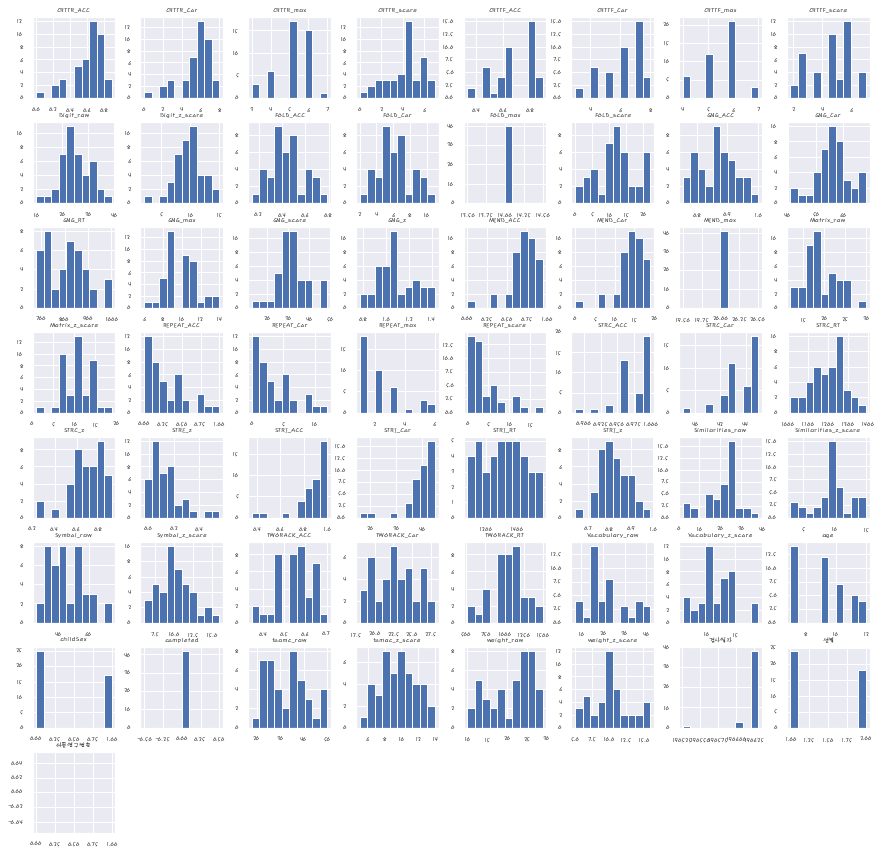

In [7]:
sns.set(font_scale=0.5)
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/HYSNRL.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)


List_s_k1[List_s_k1.dtypes[(List_s_k1.dtypes=="float64")|(List_s_k1.dtypes=="int64")]
                        .index.values].hist(figsize=[15,15])

parentUUID
pass
taskUUID
pass
parentName
pass
childName
pass
childSex
pass
childBirth
pass
taskCreated
pass
taskUpdated
pass
completed
pass
age
pass
CBTTF_Cor
pass
CBTTF_ACC


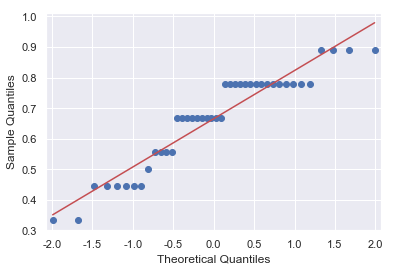

CBTTF_max


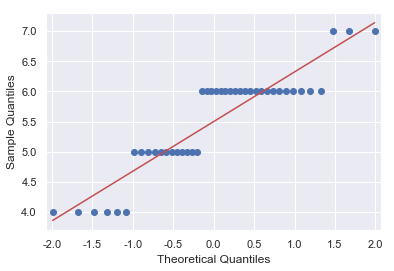

CBTTB_Cor
pass
CBTTB_ACC


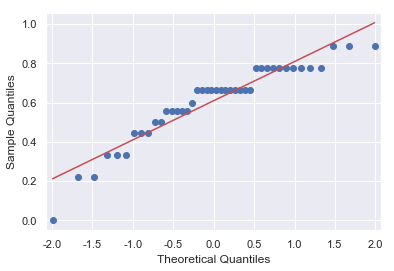

CBTTB_max


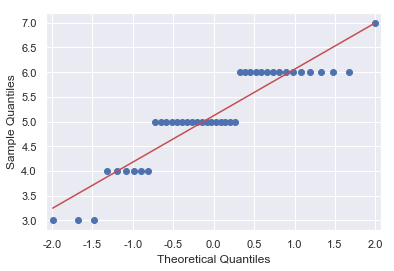

GNG_Cor
pass
GNG_RT


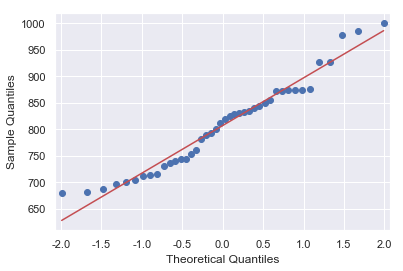

GNG_ACC


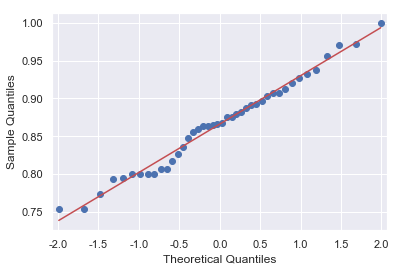

GNG_max


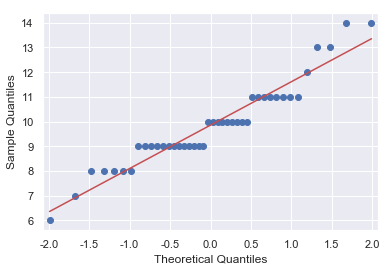

TWOBACK_Cor
pass
TWOBACK_RT


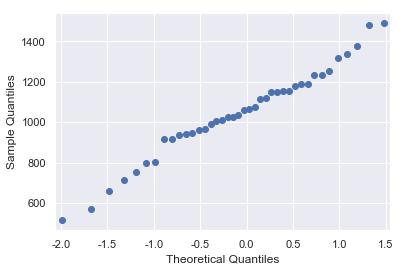

TWOBACK_ACC


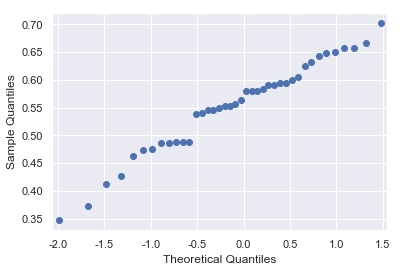

STRC_Cor
pass
STRC_RT


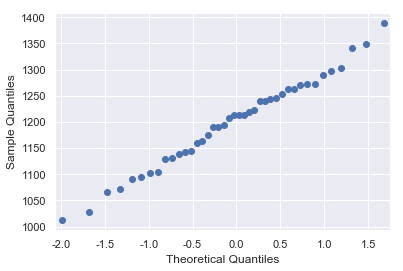

STRC_ACC


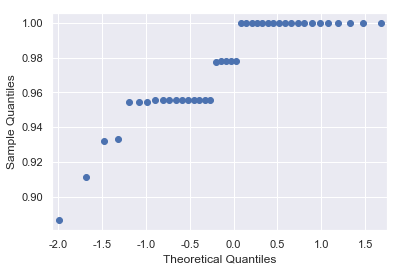

STRI_Cor
pass
STRI_RT


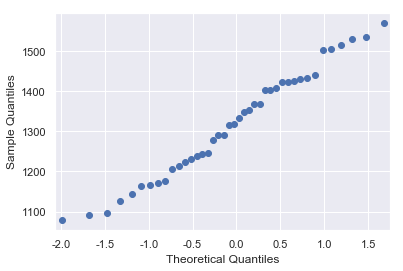

STRI_ACC


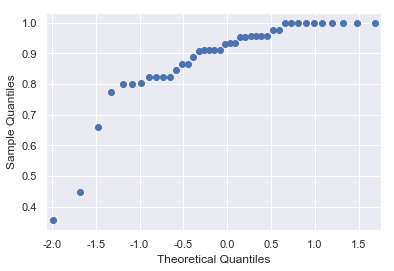

REPEAT_Cor
pass
REPEAT_ACC


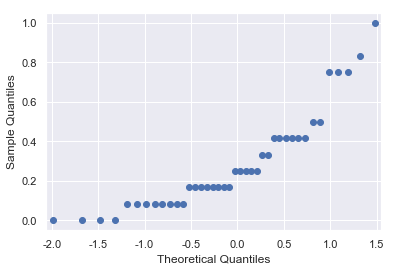

REPEAT_max


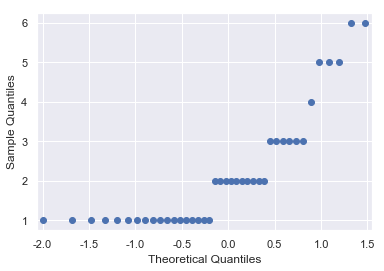

MIND_Cor
pass
MIND_ACC


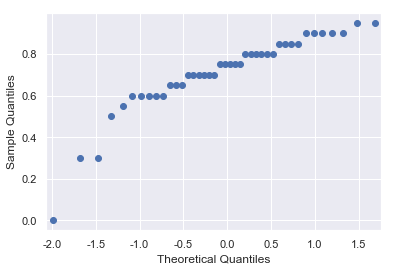

MIND_max


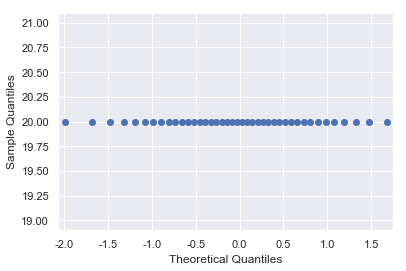

FOLD_Cor
pass
FOLD_ACC


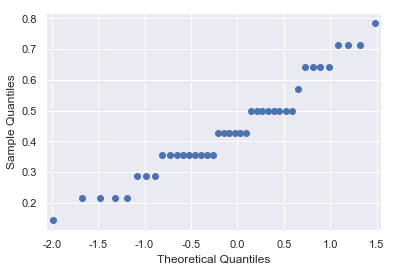

FOLD_max


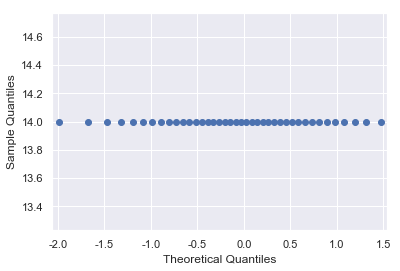

GNG_z


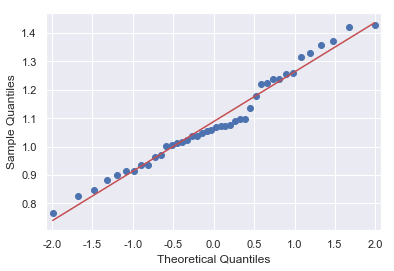

STRC_z


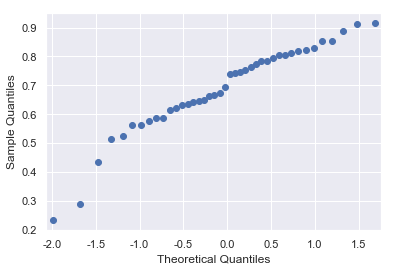

STRI_z


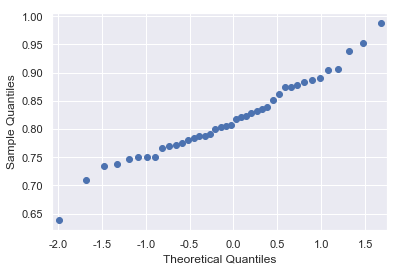

STRE_z


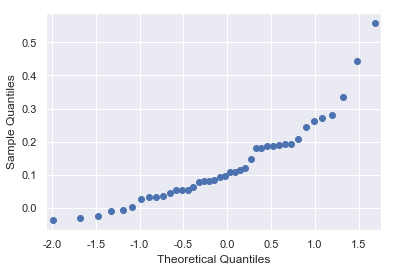

CBTTF_score


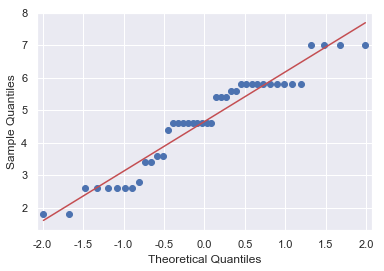

CBTTB_score


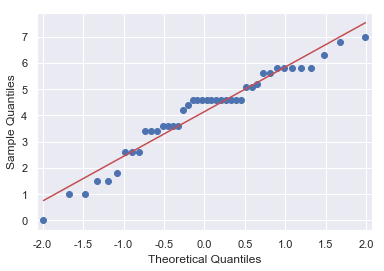

GNG_score


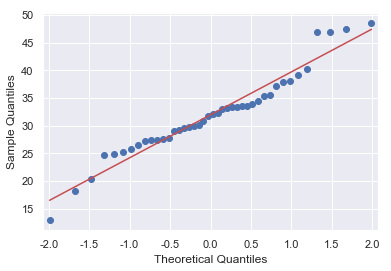

REPEAT_score


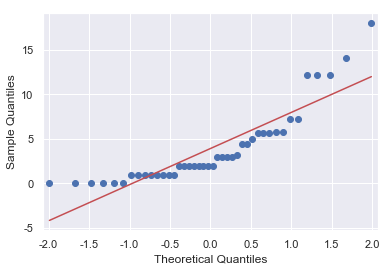

FOLD_score


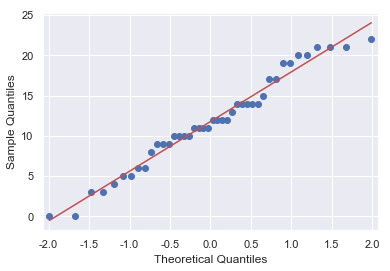

검사일자
pass
검사장소
pass
아동연구번호
pass
아동명
pass
성별
pass
생년월일
pass
연령(세.개월)
pass
K-WISC-V 검사자
pass
toamc_raw


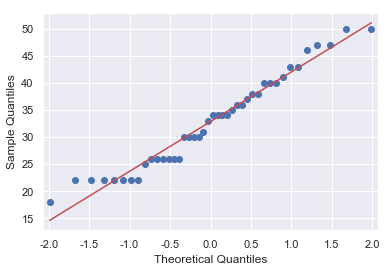

tomac_z_score


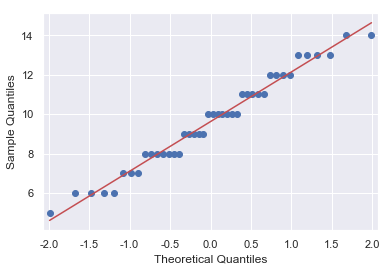

Similarities_raw


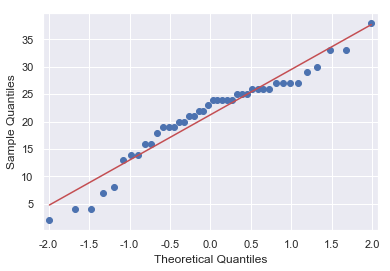

Similarities_z_score


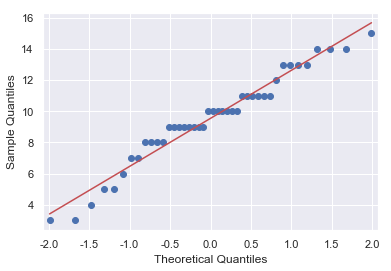

Matrix_raw


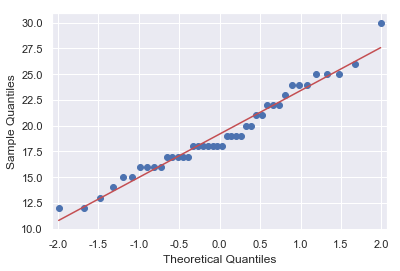

Matrix_z_score


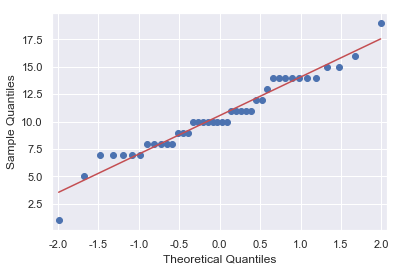

Digit_raw


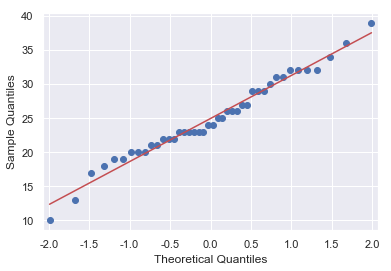

Digit_z_score


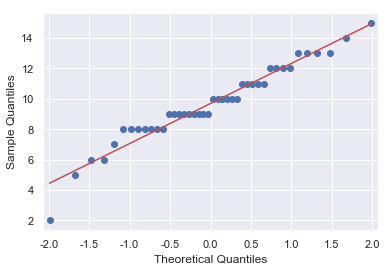

Symbol_raw


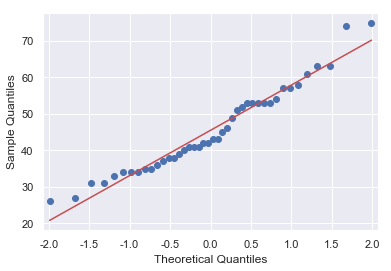

Symbol_z_score


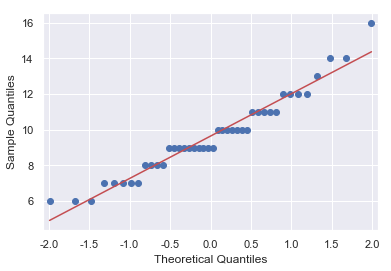

Vocabulary_raw


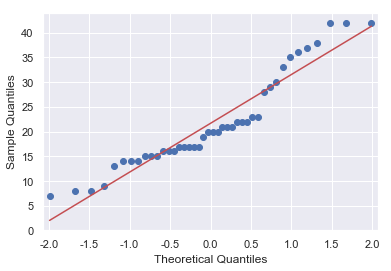

Vocabulary_z_score


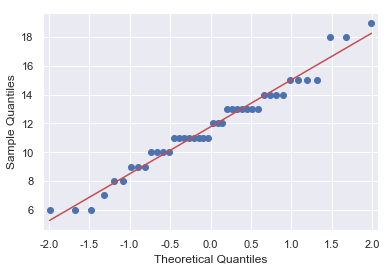

weight_raw


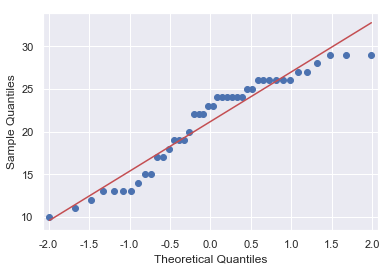

weight_z_score


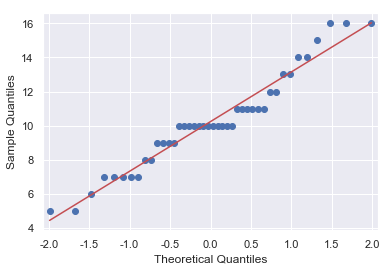

In [8]:
from statsmodels.graphics.gofplots import qqplot

sns.set(font_scale=1)
for feature in List_s_k1:
    print(feature)
    if 'RT' in feature or 'ACC' in feature or 'max' in feature or '_z' in feature or 'raw' in feature or 'score' in feature: 
        a = List_s_k1[feature]
        qqplot(a,line='r')
        plt.show()
    else:
        print('pass')
        pass
       

parentUUID
pass
taskUUID
pass
parentName
pass
childName
pass
childSex
pass
childBirth
pass
taskCreated
pass
taskUpdated
pass
completed
pass
age
pass
CBTTF_Cor
pass
CBTTF_ACC


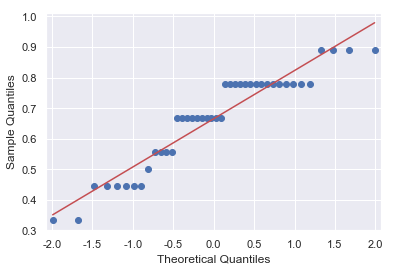

CBTTF_max


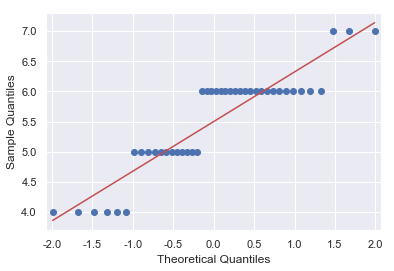

CBTTB_Cor
pass
CBTTB_ACC


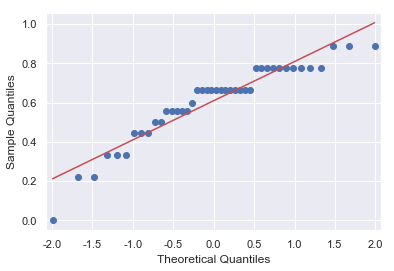

CBTTB_max


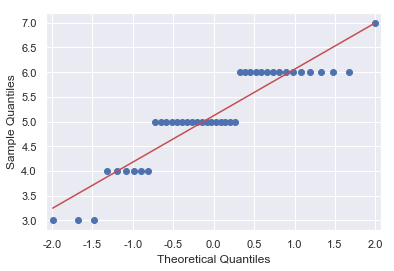

GNG_Cor
pass
GNG_RT


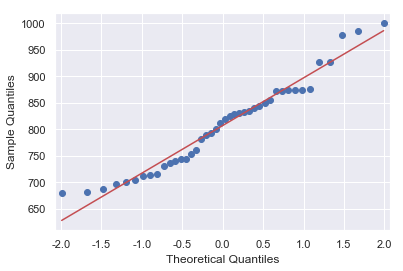

GNG_ACC


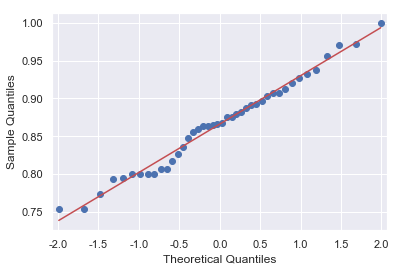

GNG_max


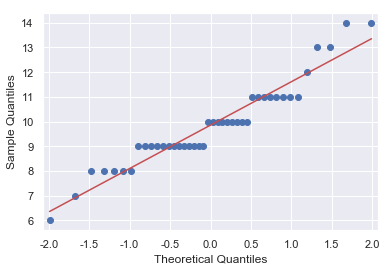

TWOBACK_Cor
pass
TWOBACK_RT


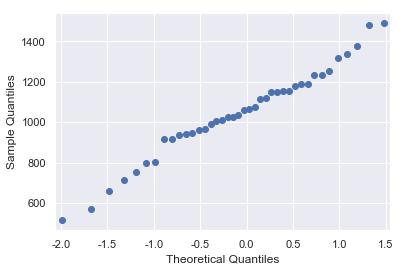

TWOBACK_ACC


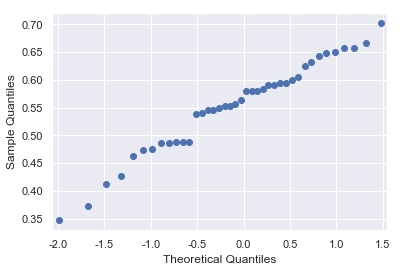

STRC_Cor
pass
STRC_RT


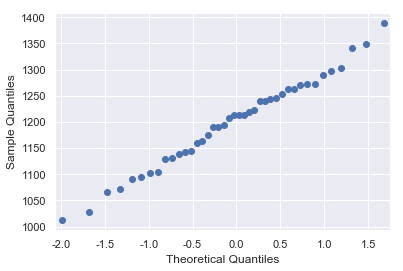

STRC_ACC


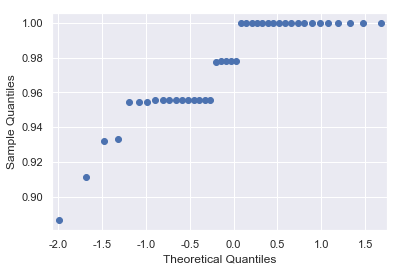

STRI_Cor
pass
STRI_RT


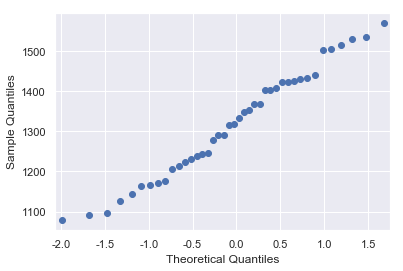

STRI_ACC


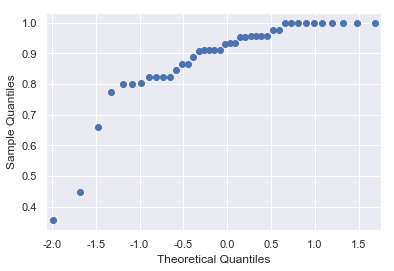

REPEAT_Cor
pass
REPEAT_ACC


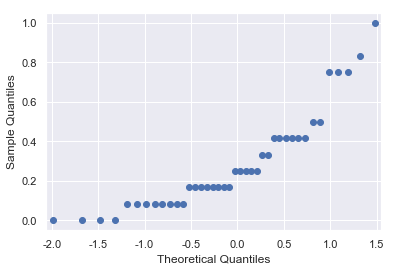

REPEAT_max


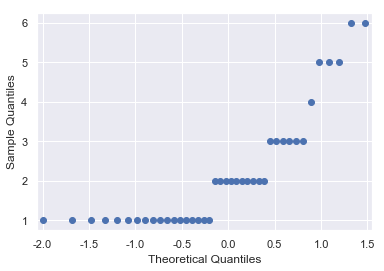

MIND_Cor
pass
MIND_ACC


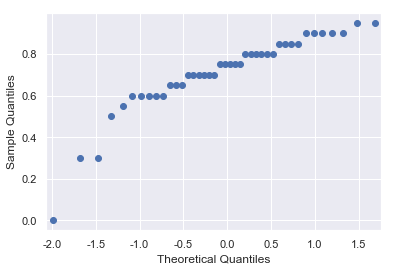

MIND_max


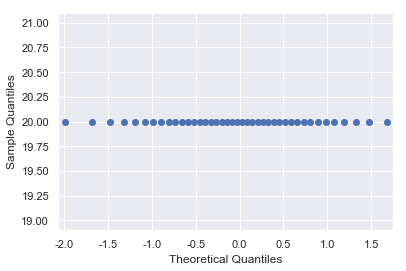

FOLD_Cor
pass
FOLD_ACC


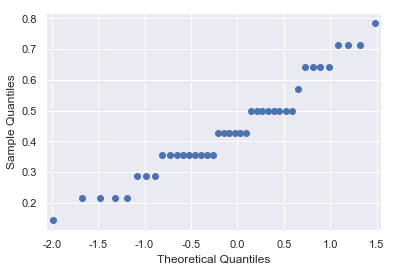

FOLD_max


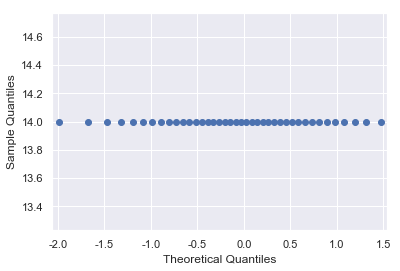

GNG_z


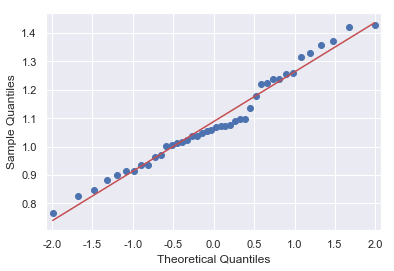

STRC_z


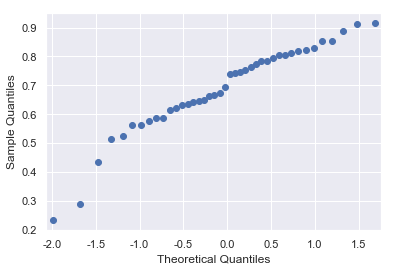

STRI_z


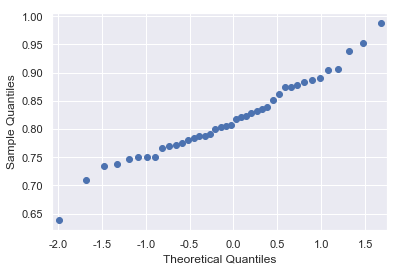

STRE_z


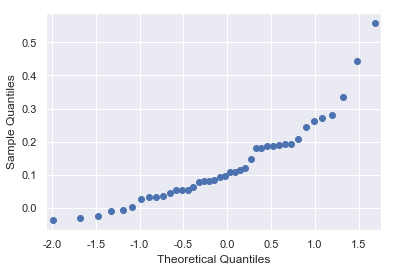

CBTTF_score


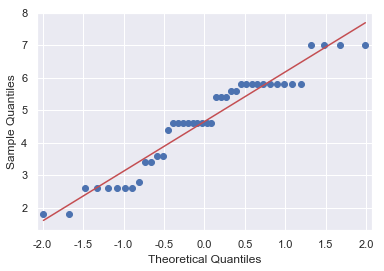

CBTTB_score


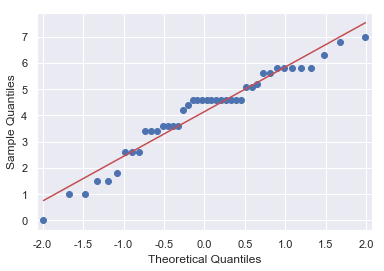

GNG_score


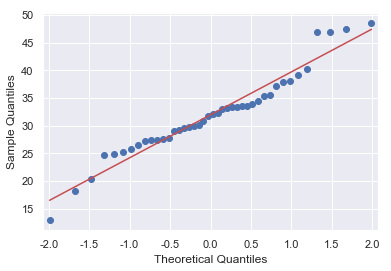

REPEAT_score


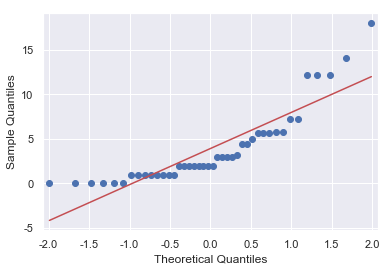

FOLD_score


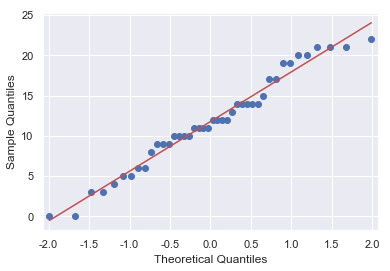

검사일자
pass
검사장소
pass
아동연구번호
pass
아동명
pass
성별
pass
생년월일
pass
연령(세.개월)
pass
K-WISC-V 검사자
pass
toamc_raw


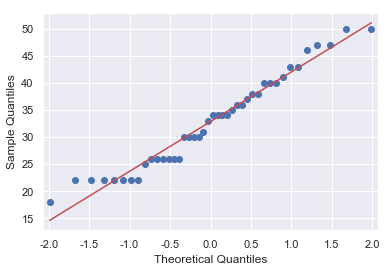

tomac_z_score


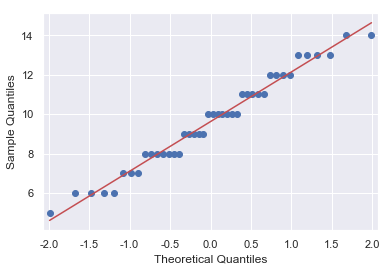

Similarities_raw


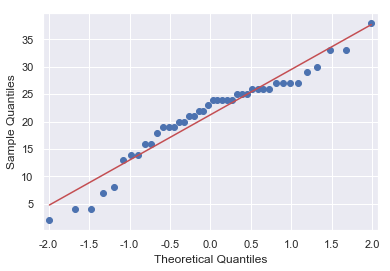

Similarities_z_score


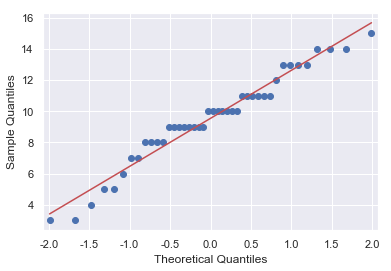

Matrix_raw


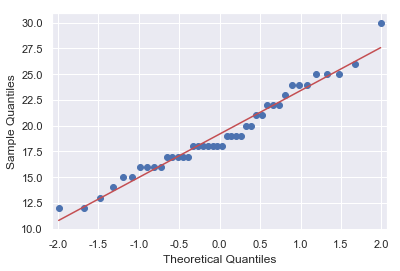

Matrix_z_score


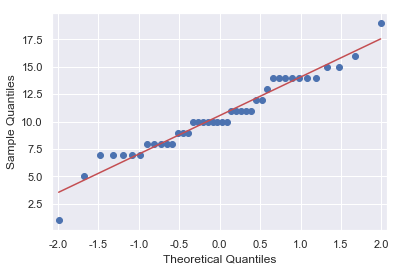

Digit_raw


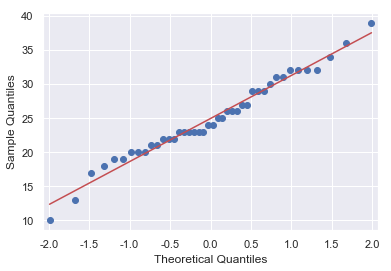

Digit_z_score


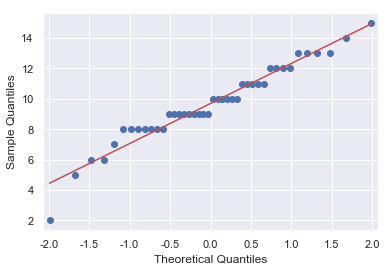

Symbol_raw


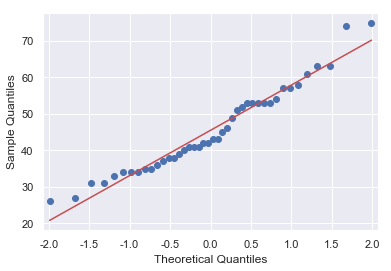

Symbol_z_score


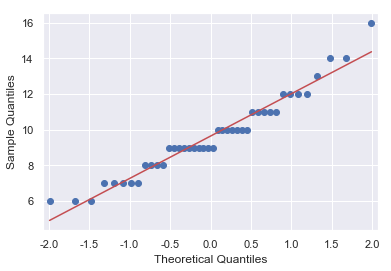

Vocabulary_raw


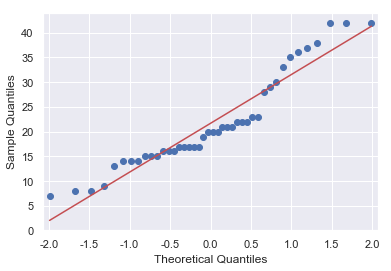

Vocabulary_z_score


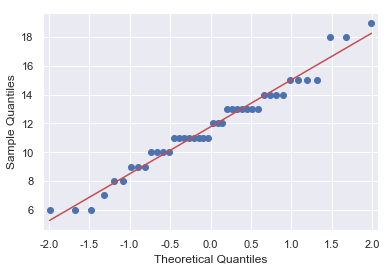

weight_raw


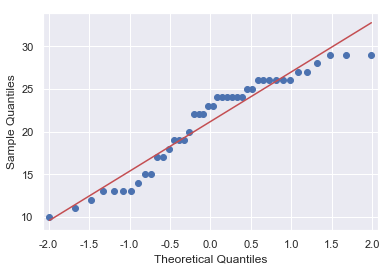

weight_z_score


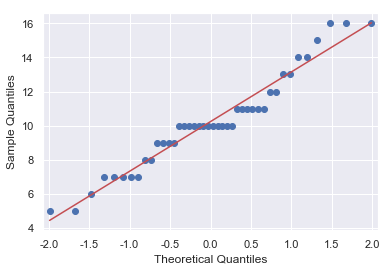

In [9]:
from statsmodels.graphics.gofplots import qqplot

for feature in List_s_k1:
    print(feature)
    if 'RT' in feature or 'ACC' in feature or 'max' in feature or '_z' in feature or 'raw' in feature or 'score' in feature: 
        a = List_s_k1[feature]
        qqplot(a,line='r')
        plt.show()
    else:
        print('pass')
        pass
       

parentUUID
pass
taskUUID
pass
parentName
pass
childName
pass
childSex
pass
childBirth
pass
taskCreated
pass
taskUpdated
pass
completed
pass
age
pass
CBTTF_Cor
pass
CBTTF_ACC


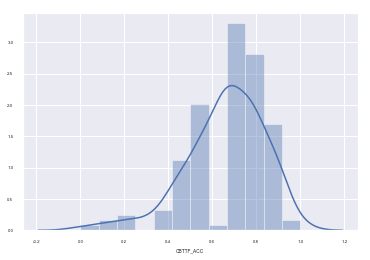

CBTTF_max


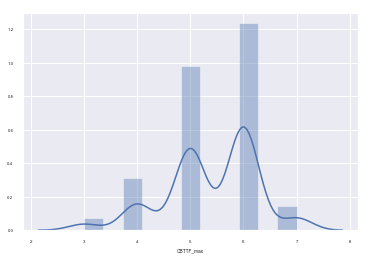

CBTTB_Cor
pass
CBTTB_ACC


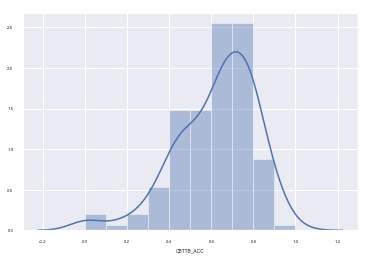

CBTTB_max


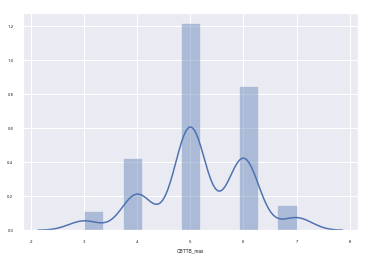

GNG_Cor
pass
GNG_RT


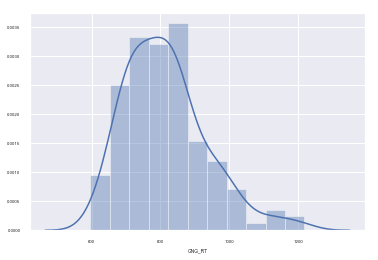

GNG_ACC


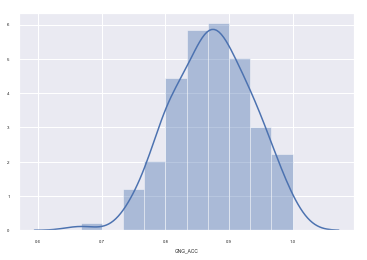

GNG_max


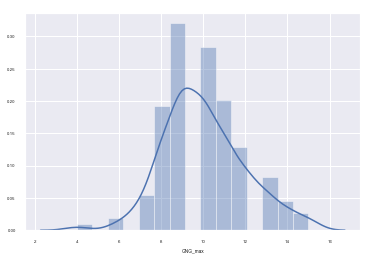

TWOBACK_Cor
pass
TWOBACK_RT


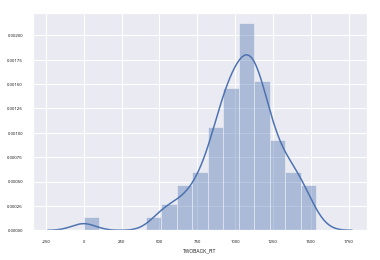

TWOBACK_ACC


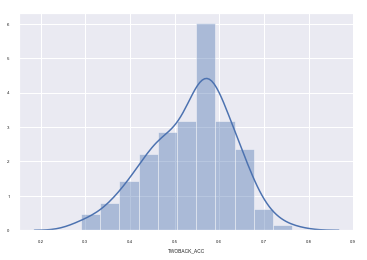

STRC_Cor
pass
STRC_RT


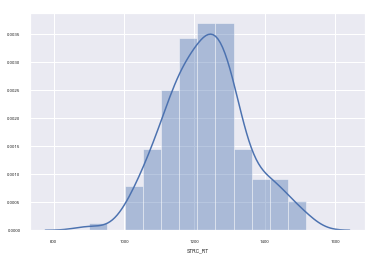

STRC_ACC


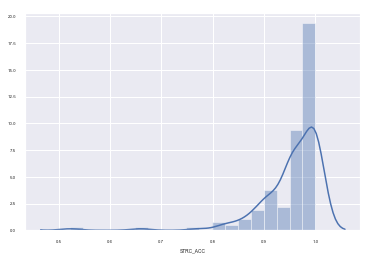

STRI_Cor
pass
STRI_RT


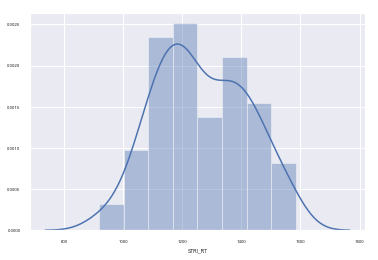

STRI_ACC


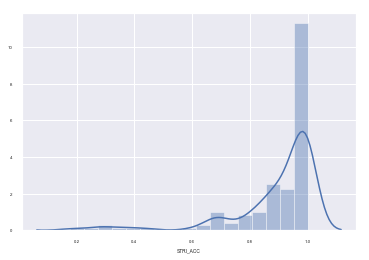

REPEAT_Cor
pass
REPEAT_ACC


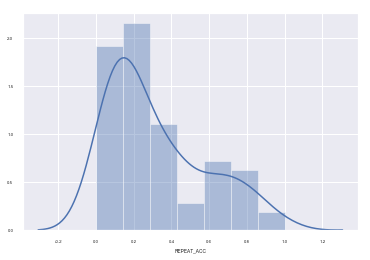

REPEAT_max


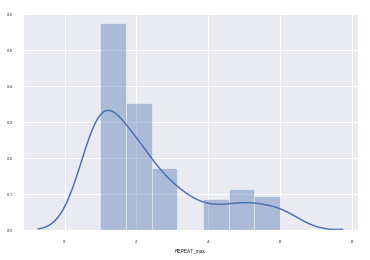

MIND_Cor
pass
MIND_ACC


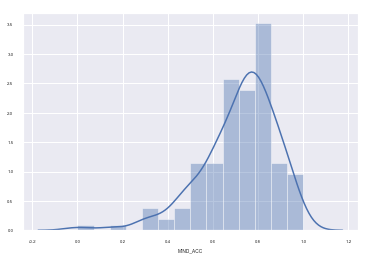

MIND_max


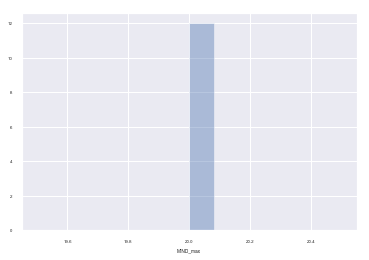

FOLD_Cor
pass
FOLD_ACC


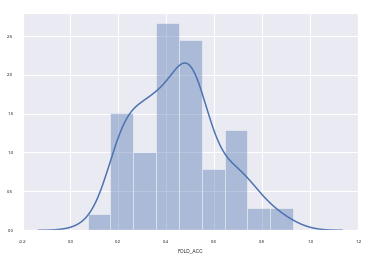

FOLD_max


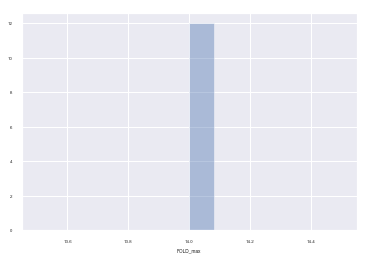

GNG_z


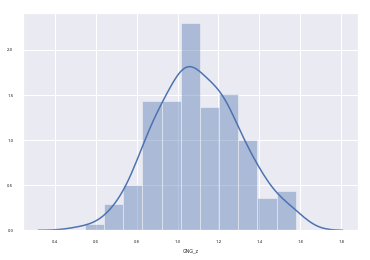

STRC_z


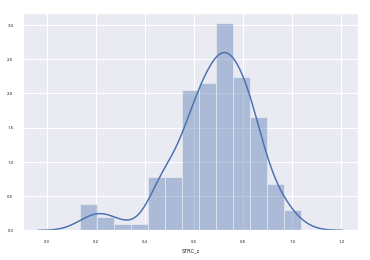

STRI_z


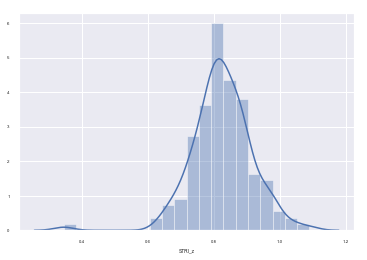

STRE_z


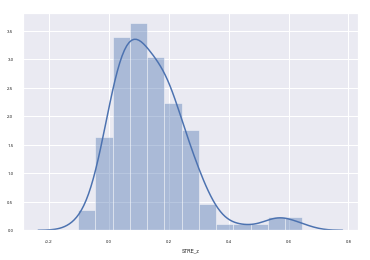

CBTTF_score


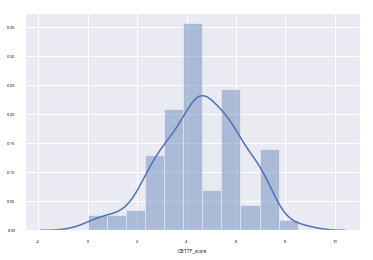

CBTTB_score


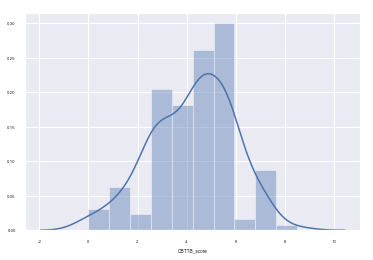

GNG_score


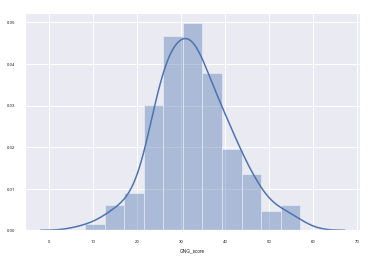

REPEAT_score


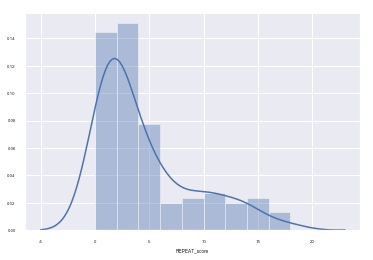

FOLD_score


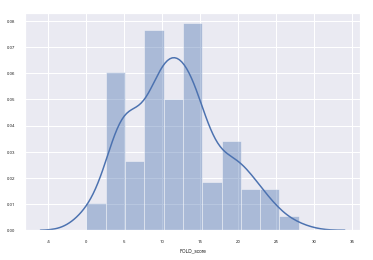

In [362]:
for feature in List_s:
    print(feature)
    if 'RT' in feature or 'ACC' in feature or 'max' in feature or '_z' in feature or 'raw' in feature or 'score' in feature: 
        a = List_s[feature]
        sns.distplot(a.dropna())
        plt.show()
    else:
        print('pass')
        pass
       

C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\l

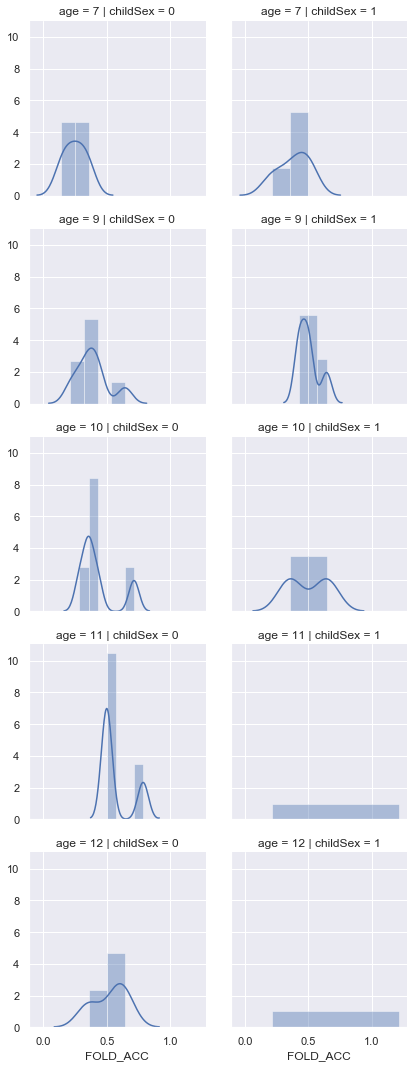

In [10]:
sns.set(font_scale = 1)
g = sns.FacetGrid(List_s_k1, row='age', col='childSex')
g.map(sns.distplot, "FOLD_ACC")
plt.show()

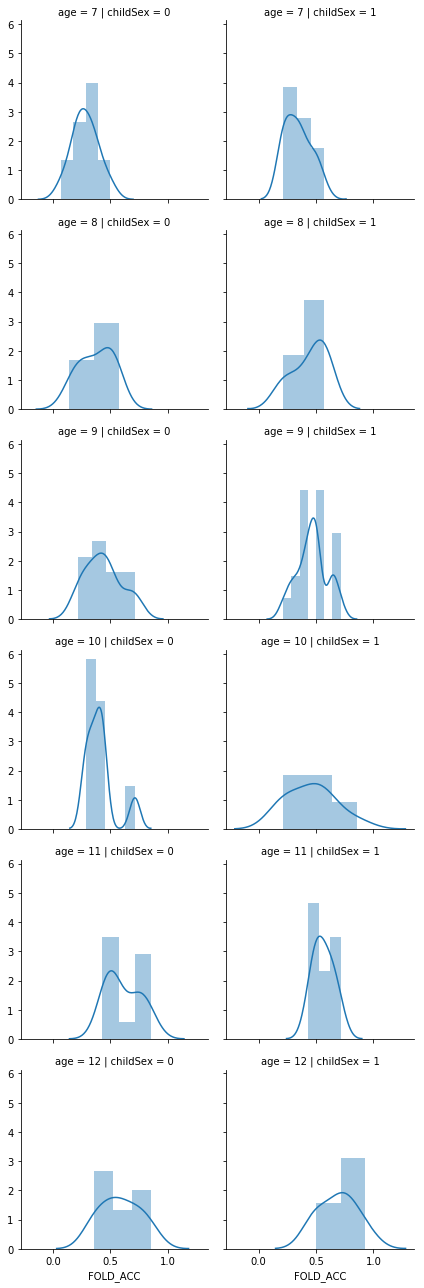

In [316]:
g = sns.FacetGrid(List_s, row='age', col='childSex')
g.map(sns.distplot, "FOLD_ACC")
plt.show()

In [319]:
List_s_k1.columns

Index(['parentUUID', 'taskUUID', 'parentName', 'childName', 'childSex',
       'childBirth', 'taskCreated', 'taskUpdated', 'completed', 'age',
       'CBTTF_Cor', 'CBTTF_ACC', 'CBTTF_max', 'CBTTB_Cor', 'CBTTB_ACC',
       'CBTTB_max', 'GNG_Cor', 'GNG_RT', 'GNG_ACC', 'GNG_max', 'TWOBACK_Cor',
       'TWOBACK_RT', 'TWOBACK_ACC', 'STRC_Cor', 'STRC_RT', 'STRC_ACC',
       'STRI_Cor', 'STRI_RT', 'STRI_ACC', 'REPEAT_Cor', 'REPEAT_ACC',
       'REPEAT_max', 'MIND_Cor', 'MIND_ACC', 'MIND_max', 'FOLD_Cor',
       'FOLD_ACC', 'FOLD_max', 'GNG_z', 'STRC_z', 'STRI_z', 'STRE_z',
       'CBTTF_score', 'CBTTB_score', 'GNG_score', 'REPEAT_score', 'FOLD_score',
       '검사일자', '검사장소', '아동연구번호', '아동명', '성별', '생년월일', '연령(세.개월)',
       'K-WISC-V 검사자', 'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score

In [11]:
List_s_k1.age.value_counts()

7     14
9     12
10     7
11     5
12     4
Name: age, dtype: int64

In [13]:
List_s_k_corr = List_s_k1[['childName', 'childSex', 'age',
       'CBTTF_Cor', 'CBTTF_ACC', 'CBTTF_max', 'CBTTB_Cor', 'CBTTB_ACC',
       'CBTTB_max', 'GNG_Cor', 'GNG_RT', 'GNG_ACC', 'GNG_max', 'TWOBACK_Cor',
       'TWOBACK_RT', 'TWOBACK_ACC', 'STRC_Cor', 'STRC_RT', 'STRC_ACC',
       'STRI_Cor', 'STRI_RT', 'STRI_ACC', 'REPEAT_Cor', 'REPEAT_ACC',
       'REPEAT_max', 'MIND_Cor', 'MIND_ACC', 'FOLD_Cor',
       'FOLD_ACC', 'GNG_z', 'STRC_z', 'STRI_z', 'STRE_z',
       'CBTTF_score', 'CBTTB_score', 'GNG_score', 'REPEAT_score', 'FOLD_score',
       'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score']]

OBE_corr = List_s_k1[['childName', 'childSex', 'age',
       'CBTTF_Cor', 'CBTTF_ACC', 'CBTTF_max', 'CBTTB_Cor', 'CBTTB_ACC',
       'CBTTB_max', 'GNG_Cor', 'GNG_RT', 'GNG_ACC', 'GNG_max', 'TWOBACK_Cor',
       'TWOBACK_RT', 'TWOBACK_ACC', 'STRC_Cor', 'STRC_RT', 'STRC_ACC',
       'STRI_Cor', 'STRI_RT', 'STRI_ACC', 'REPEAT_Cor', 'REPEAT_ACC',
       'REPEAT_max', 'MIND_Cor', 'MIND_ACC', 'FOLD_Cor',
       'FOLD_ACC', 'GNG_z', 'STRC_z', 'STRI_z', 'STRE_z',
       'CBTTF_score', 'CBTTB_score', 'GNG_score', 'REPEAT_score', 'FOLD_score']]

CBTT_corr = List_s_k1[['childName', 'childSex', 'age',
       'CBTTF_Cor', 'CBTTF_ACC', 'CBTTF_max',
       'CBTTB_Cor', 'CBTTB_ACC', 'CBTTB_max', 
       'CBTTF_score', 'CBTTB_score',
       'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score']]

GNG_corr = List_s_k1[['childName', 'childSex', 'age',
       'GNG_Cor', 'GNG_RT', 'GNG_ACC', 'GNG_max', 'GNG_score',
       'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score']]

TWOBACK_corr = List_s_k1[['childName', 'childSex', 'age',
       'TWOBACK_Cor', 'TWOBACK_RT', 'TWOBACK_ACC',
       'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score']]

STR_corr = List_s_k1[['childName', 'childSex', 'age',
       'STRC_Cor', 'STRC_RT', 'STRC_ACC',
       'STRI_Cor', 'STRI_RT', 'STRI_ACC', 
       'STRC_z', 'STRI_z', 'STRE_z',
       'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score']]

STR_corr['STRE'] = STR_corr['STRI_RT'] - STR_corr['STRC_RT']

REPEAT_corr = List_s_k1[['childName', 'childSex', 'age',
       'REPEAT_Cor', 'REPEAT_ACC', 'REPEAT_max', 'REPEAT_score',
       'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score']]

MIND_corr = List_s_k1[['childName', 'childSex', 'age',
       'MIND_Cor', 'MIND_ACC',
       'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score']]

FOLD_corr = List_s_k1[['childName', 'childSex', 'age',
       'FOLD_ACC', 'FOLD_score',
       'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score']]


# OBE_s_corr = List_s[['childName', 'childSex', 'age',+
#        'CBTTF_Cor', 'CBTTF_ACC', 'CBTTF_max', 'CBTTB_Cor', 'CBTTB_ACC',
#        'CBTTB_max', 'GNG_Cor', 'GNG_RT', 'GNG_ACC', 'GNG_max', 'TWOBACK_Cor',
#        'TWOBACK_RT', 'TWOBACK_ACC', 'STRC_Cor', 'STRC_RT', 'STRC_ACC',
#        'STRI_Cor', 'STRI_RT', 'STRI_ACC', 'REPEAT_Cor', 'REPEAT_ACC',
#        'REPEAT_max', 'MIND_Cor', 'MIND_ACC', 'FOLD_Cor',
#        'FOLD_ACC', 'GNG_z', 'STRC_z', 'STRI_z', 'STRE_z',
#        'CBTTF_score', 'CBTTB_score', 'GNG_score', 'REPEAT_score', 'FOLD_score']]

# OBE_s_corr['STRE'] = STR_corr['STRI_RT'] - STR_corr['STRC_RT']

C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
OBE_corr.corr()

,childSex,age,CBTTF_Cor,CBTTF_ACC,CBTTF_max,CBTTB_Cor,CBTTB_ACC,CBTTB_max,GNG_Cor,GNG_RT,...,FOLD_ACC,GNG_z,STRC_z,STRI_z,STRE_z,CBTTF_score,CBTTB_score,GNG_score,REPEAT_score,FOLD_score
childSex,1.000000,-0.271049,-0.142378,-0.134109,-0.029443,0.002662,0.003973,-0.053342,-0.033229,0.217019,...,0.152189,-0.176409,-0.235670,-0.016972,0.274153,-0.126868,-0.011086,-0.009999,0.213581,0.143556
age,-0.271049,1.000000,0.653978,0.659246,0.540951,0.672348,0.679026,0.605977,0.736499,-0.566292,...,0.542112,0.756015,0.532004,0.534898,-0.343165,0.648315,0.695166,0.714327,0.284441,0.683305
CBTTF_Cor,-0.142378,0.653978,1.000000,0.998479,0.805961,0.654428,0.641135,0.506684,0.529608,-0.386053,...,0.312825,0.497125,0.526513,0.362729,-0.432149,0.990792,0.632927,0.509935,0.297591,0.494388
CBTTF_ACC,-0.134109,0.659246,0.998479,1.000000,0.804870,0.666870,0.653405,0.513109,0.526919,-0.383468,...,0.323543,0.494769,0.528077,0.366193,-0.432107,0.990407,0.644820,0.507298,0.301271,0.503675
CBTTF_max,-0.029443,0.540951,0.805961,0.804870,1.000000,0.599619,0.599934,0.388069,0.499951,-0.447817,...,0.220990,0.501134,0.546785,0.503910,-0.378155,0.833444,0.579025,0.481217,0.268912,0.356257
CBTTB_Cor,0.002662,0.672348,0.654428,0.666870,0.599619,1.000000,0.996870,0.845638,0.634436,-0.417545,...,0.330816,0.571222,0.610451,0.509440,-0.451693,0.638219,0.986486,0.601675,0.273260,0.510294
CBTTB_ACC,0.003973,0.679026,0.641135,0.653405,0.599934,0.996870,1.000000,0.844199,0.643419,-0.424532,...,0.349387,0.586166,0.621605,0.528379,-0.454599,0.626367,0.985543,0.610139,0.238879,0.521532
CBTTB_max,-0.053342,0.605977,0.506684,0.513109,0.388069,0.845638,0.844199,1.000000,0.582507,-0.424287,...,0.266742,0.571782,0.573282,0.480038,-0.423293,0.473392,0.870607,0.560660,0.252749,0.458130
GNG_Cor,-0.033229,0.736499,0.529608,0.526919,0.499951,0.634436,0.643419,0.582507,1.000000,-0.766885,...,0.407274,0.923318,0.517774,0.605528,-0.286827,0.512306,0.631268,0.980404,0.362832,0.512501
GNG_RT,0.217019,-0.566292,-0.386053,-0.383468,-0.447817,-0.417545,-0.424532,-0.424287,-0.766885,1.000000,...,-0.294446,-0.899043,-0.388934,-0.523395,0.177398,-0.389175,-0.437954,-0.701971,-0.269218,-0.365401


<function matplotlib.pyplot.show(*args, **kw)>

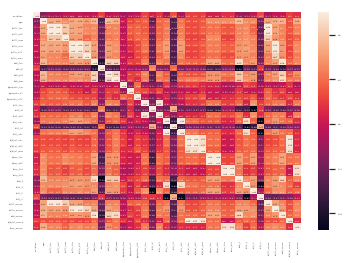

In [15]:
sns.set(font_scale=0.2)
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/HYSNRL.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)


sns.heatmap(OBE_corr.corr(), annot=True, fmt=".2f" )
plt.savefig('heatmap.png', format='png', dpi=500)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

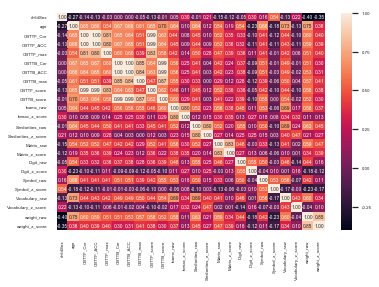

In [16]:
sns.set(font_scale=0.4)
sns.heatmap(CBTT_corr.corr(), annot=True, fmt=".2f" )
plt.savefig('CBTT_corr.png', format='png', dpi=500)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

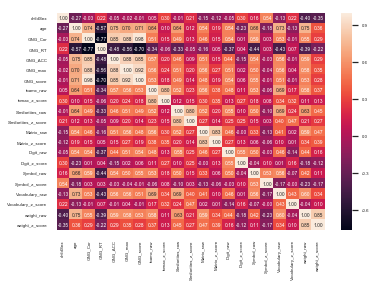

In [17]:
sns.set(font_scale=0.4)
sns.heatmap(GNG_corr.corr(), annot=True, fmt=".2f" )
plt.savefig('GNG_corr.png', format='png', dpi=500)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

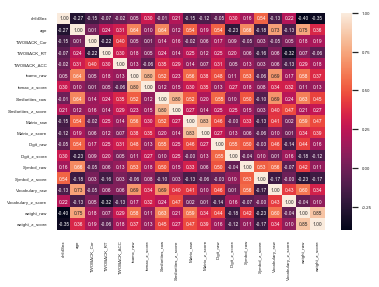

In [18]:
sns.set(font_scale=0.4)
sns.heatmap(TWOBACK_corr.corr(), annot=True, fmt=".2f" )
plt.savefig('TWOBACK_corr.png', format='png', dpi=500)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

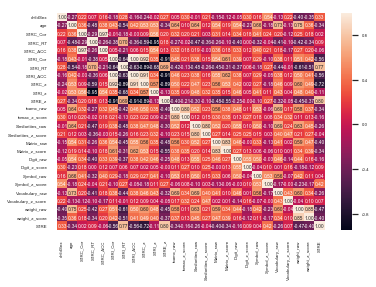

In [19]:
sns.set(font_scale=0.4)
sns.heatmap(STR_corr.corr(), annot=True, fmt=".2f" )
plt.savefig('STR_corr.png', format='png', dpi=500)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

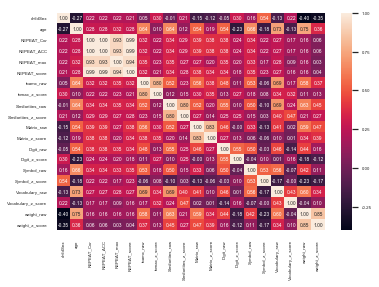

In [20]:
sns.set(font_scale=0.4)
sns.heatmap(REPEAT_corr.corr(), annot=True, fmt=".2f" )
plt.savefig('REPEAT_corr.png', format='png', dpi=500)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

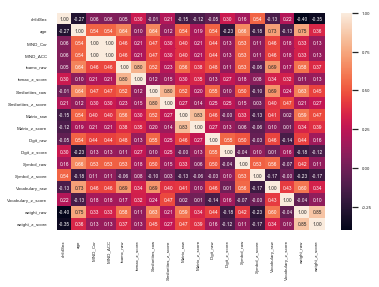

In [21]:
sns.set(font_scale=0.4)
sns.heatmap(MIND_corr.corr(), annot=True, fmt=".2f" )
plt.savefig('MIND_corr.png', format='png', dpi=500)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

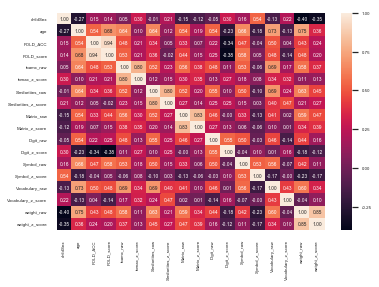

In [22]:
sns.set(font_scale=0.4)
sns.heatmap(FOLD_corr.corr(), annot=True, fmt=".2f" )
plt.savefig('FOLD_corr.png', format='png', dpi=500)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

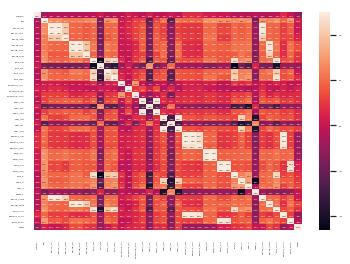

In [370]:
sns.set(font_scale=0.2)
sns.heatmap(OBE_s_corr.corr(), annot=True, fmt=".2f" )
plt.savefig('OBE_s_corr.png', format='png', dpi=500)
plt.show

In [317]:
List_s_k1.columns

Index(['parentUUID', 'taskUUID', 'parentName', 'childName', 'childSex',
       'childBirth', 'taskCreated', 'taskUpdated', 'completed', 'age',
       'CBTTF_Cor', 'CBTTF_ACC', 'CBTTF_max', 'CBTTB_Cor', 'CBTTB_ACC',
       'CBTTB_max', 'GNG_Cor', 'GNG_RT', 'GNG_ACC', 'GNG_max', 'TWOBACK_Cor',
       'TWOBACK_RT', 'TWOBACK_ACC', 'STRC_Cor', 'STRC_RT', 'STRC_ACC',
       'STRI_Cor', 'STRI_RT', 'STRI_ACC', 'REPEAT_Cor', 'REPEAT_ACC',
       'REPEAT_max', 'MIND_Cor', 'MIND_ACC', 'MIND_max', 'FOLD_Cor',
       'FOLD_ACC', 'FOLD_max', 'GNG_z', 'STRC_z', 'STRI_z', 'STRE_z',
       'CBTTF_score', 'CBTTB_score', 'GNG_score', 'REPEAT_score', 'FOLD_score',
       '검사일자', '검사장소', '아동연구번호', '아동명', '성별', '생년월일', '연령(세.개월)',
       'K-WISC-V 검사자', 'toamc_raw', 'tomac_z_score', 'Similarities_raw',
       'Similarities_z_score', 'Matrix_raw', 'Matrix_z_score', 'Digit_raw',
       'Digit_z_score', 'Symbol_raw', 'Symbol_z_score', 'Vocabulary_raw',
       'Vocabulary_z_score', 'weight_raw', 'weight_z_score

parentUUID
pass
taskUUID
pass
parentName
pass
childName
pass
childSex
pass
childBirth
pass
taskCreated
pass
taskUpdated
pass
completed
pass
age
pass
CBTTF_Cor


C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


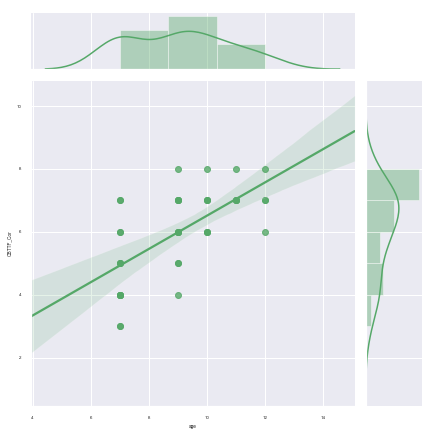

CBTTF_ACC


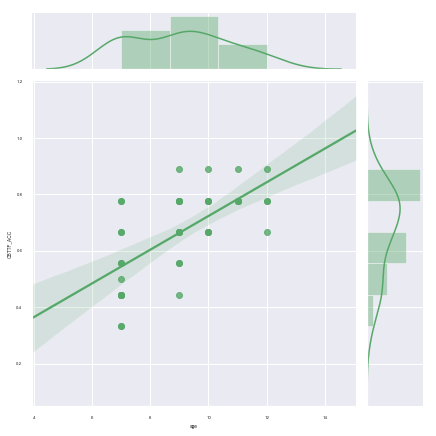

CBTTF_max


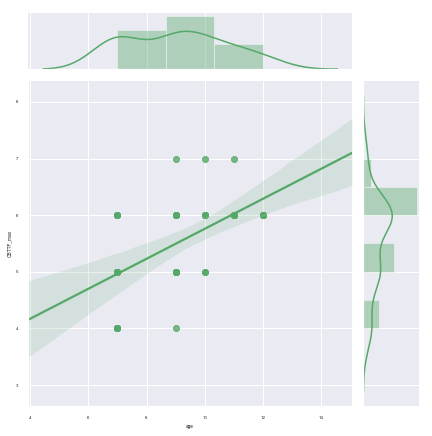

CBTTB_Cor


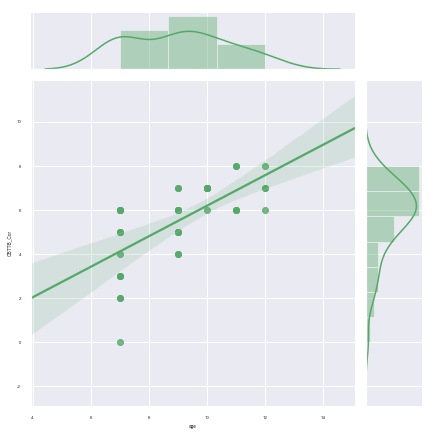

CBTTB_ACC


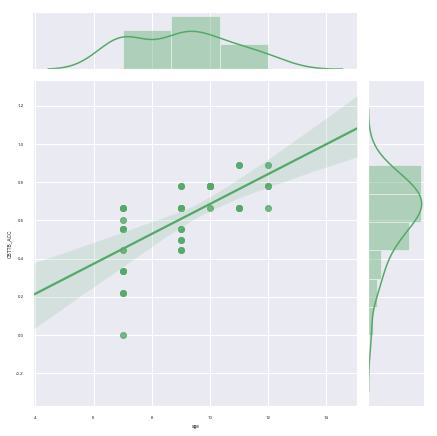

CBTTB_max


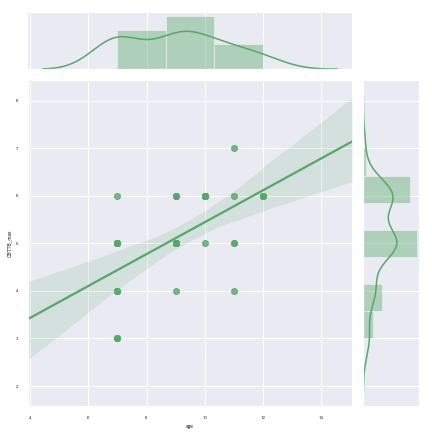

GNG_Cor


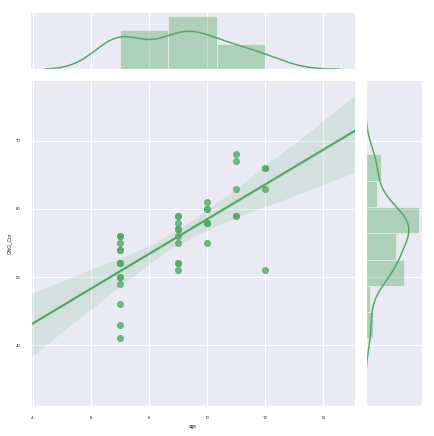

GNG_RT


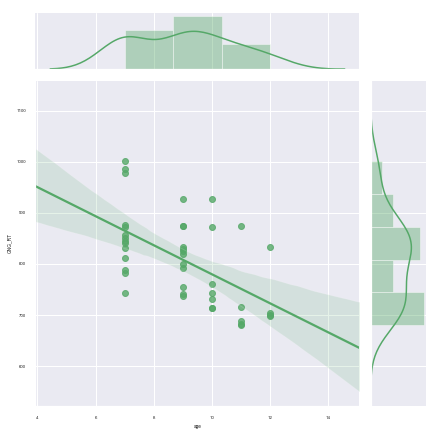

GNG_ACC


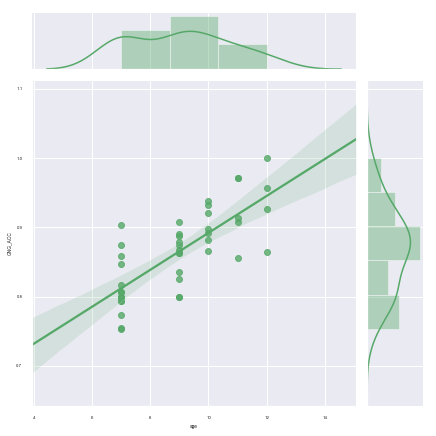

GNG_max


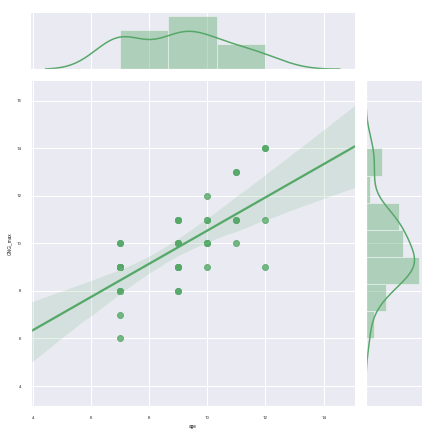

TWOBACK_Cor


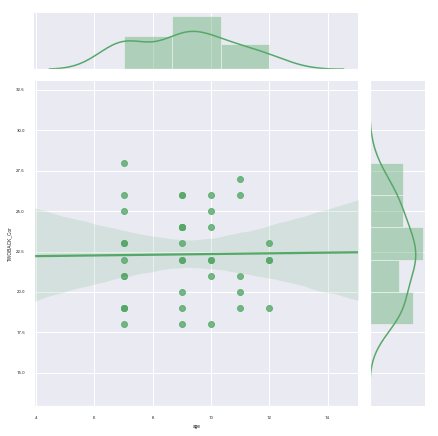

TWOBACK_RT


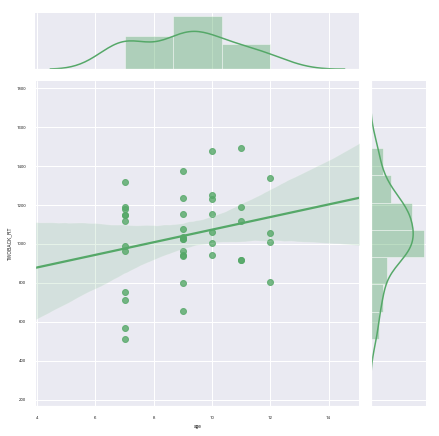

TWOBACK_ACC


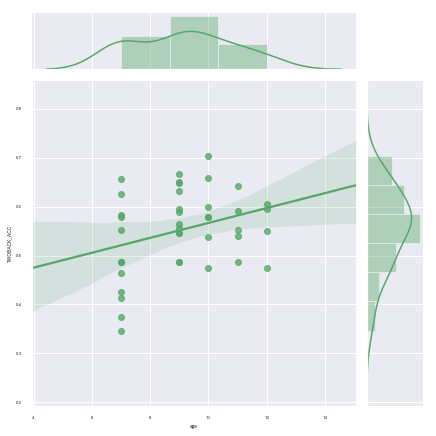

STRC_Cor


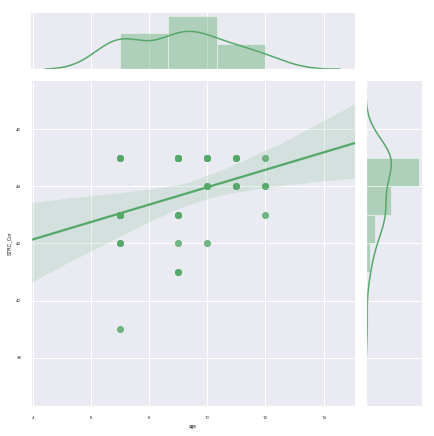

STRC_RT


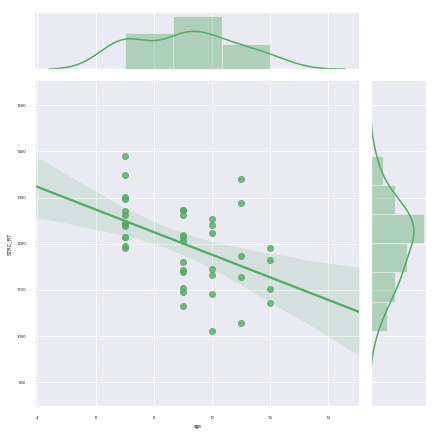

STRC_ACC


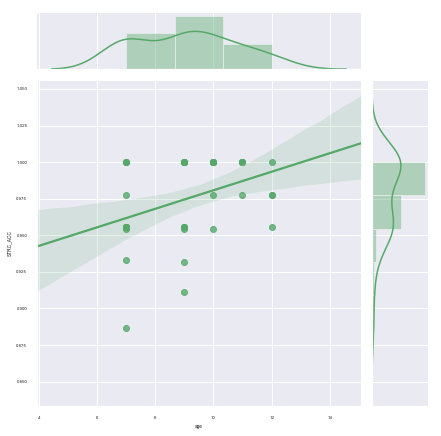

STRI_Cor


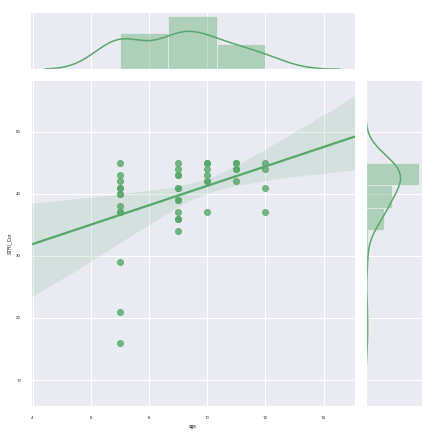

STRI_RT


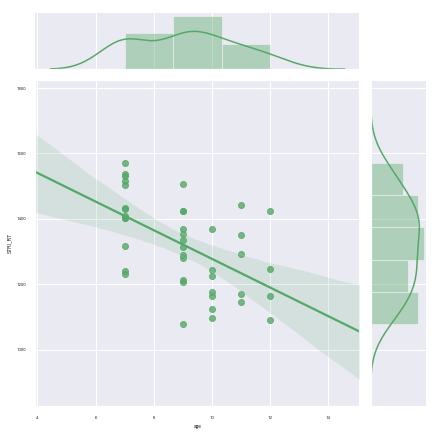

STRI_ACC


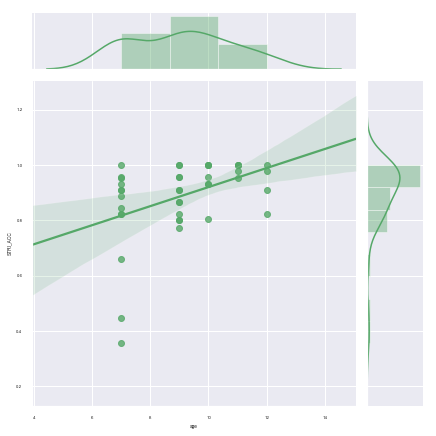

REPEAT_Cor


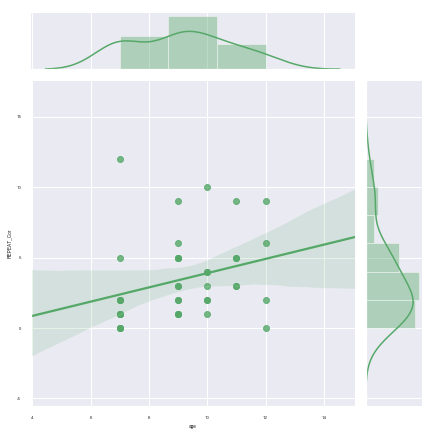

REPEAT_ACC


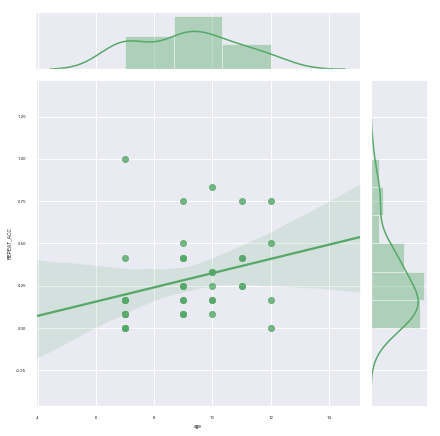

REPEAT_max


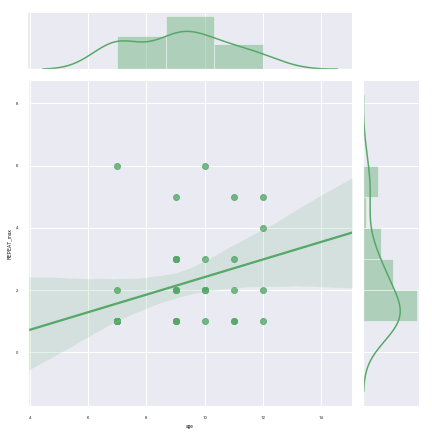

MIND_Cor


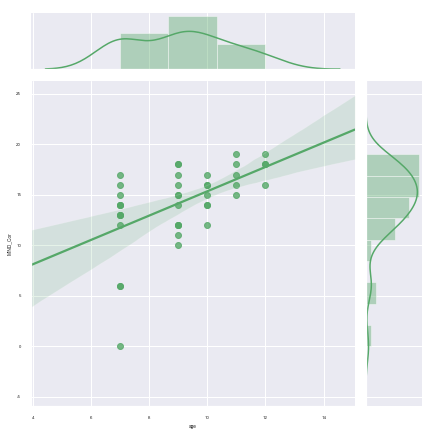

MIND_ACC


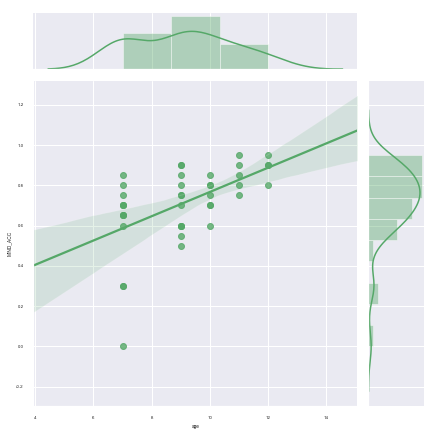

MIND_max


C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\OBELAB_JH_DESKTOP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


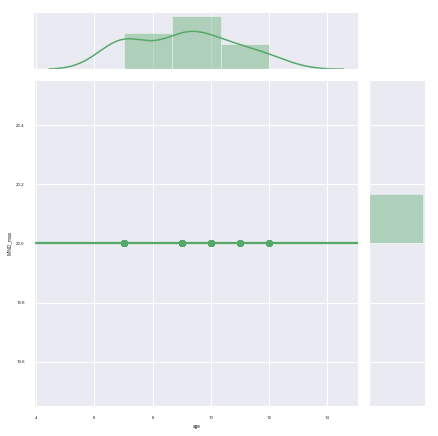

FOLD_Cor
pass
FOLD_ACC
pass
FOLD_max
pass
GNG_z


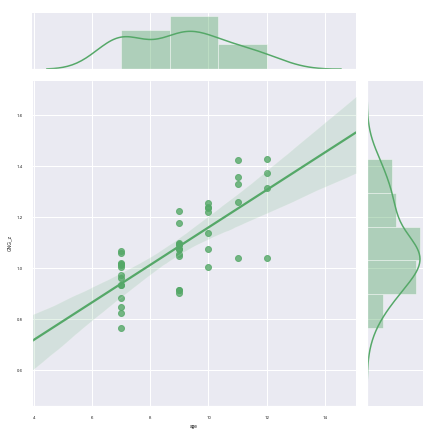

STRC_z


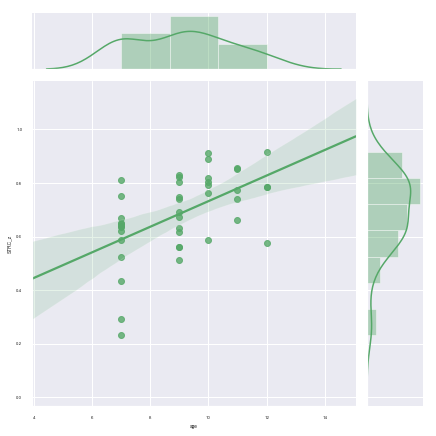

STRI_z


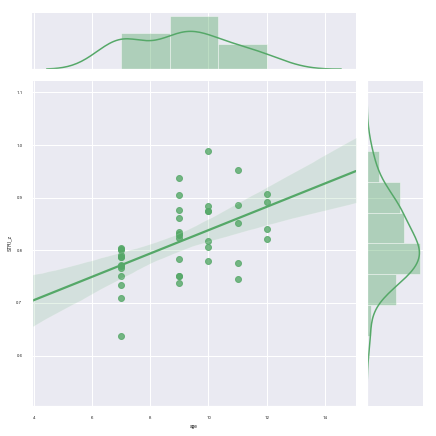

STRE_z


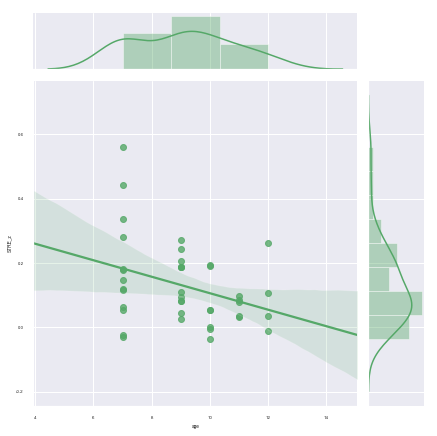

CBTTF_score


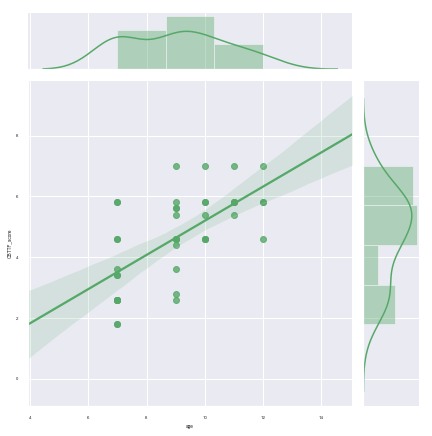

CBTTB_score


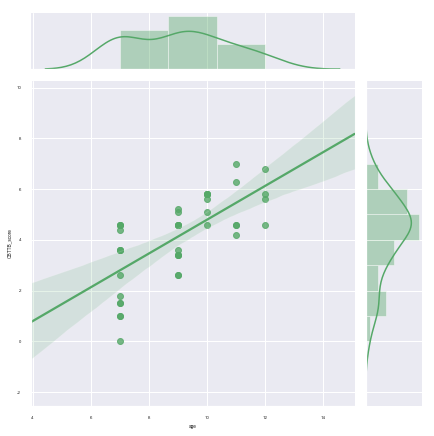

GNG_score


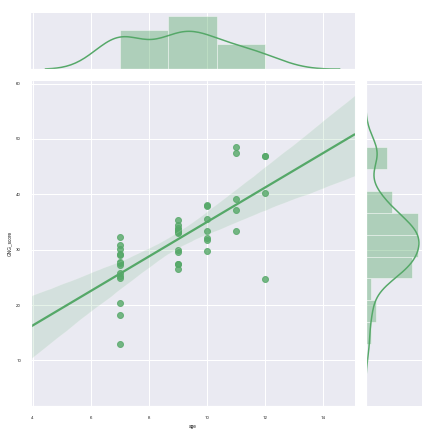

REPEAT_score


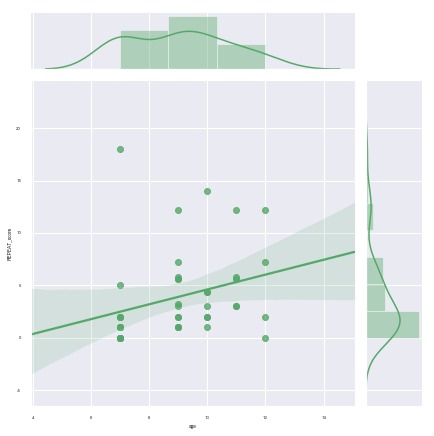

FOLD_score
pass
검사일자
pass
검사장소
pass
아동연구번호
pass
아동명
pass
성별
pass
생년월일
pass
연령(세.개월)
pass
K-WISC-V 검사자
pass
toamc_raw
pass
tomac_z_score
pass
Similarities_raw
pass
Similarities_z_score
pass
Matrix_raw
pass
Matrix_z_score
pass
Digit_raw
pass
Digit_z_score
pass
Symbol_raw
pass
Symbol_z_score
pass
Vocabulary_raw
pass
Vocabulary_z_score
pass
weight_raw
pass
weight_z_score
pass


In [24]:
for feature in List_s_k1:
    print(feature)
    if 'CBTT' in feature or 'GNG' in feature or 'TWOBACK' in feature or 'STR' in feature or 'REPEAT' in feature or 'MIND' in feature or 'FODL' in feature: 
        sns.jointplot(data=List_s_k1, x='age', y=feature, kind='reg', color='g')
        plt.savefig('%s.png' % feature, format = 'png', dpi=500)
        plt.show()
    else:
        print('pass')
        pass